# Deep Learning para la predicción de series temporales

## Redes neuronales

```{admonition} Introducción
- Las redes neuronales son ***sistemas de aprendizaje compuestos por neuronas conectadas en capas que ajustan sus conexiones para aprender***. Tras un período de ***25 años desde su inicio, las redes neuronales se convirtieron en la norma en el aprendizaje automático***. 

- En un principio, dominaron durante una década, pero ***luego fueron superadas por máquinas de vectores de soporte***. Sin embargo, ***desde 2010, las redes neuronales profundas se han vuelto populares gracias a mejoras en la tecnología y la disponibilidad de grandes conjuntos de datos***, impulsando el campo del aprendizaje automático.
```

## Gradiente descendiente

- El ***método de gradiente descendiente*** es uno de los mas ampliamente usados para la ***minimización iterativa de una función de costo diferenciable***, $J(\boldsymbol{\theta}),~\boldsymbol{\theta}\in\mathbb{R}^{l}$. Como cualquier otra técnica iterativa, el método ***parte de una estimación inicial***, $\boldsymbol{\theta}^{(0)}$, ***y genera una sucesión*** $\boldsymbol{\theta}^{(i)},~i=1,2,\dots,$ tal que:

    $$
    \boldsymbol{\theta}^{(i)}=\boldsymbol{\theta}^{(i-1)}+\mu_{i}\Delta\boldsymbol{\theta}^{(i)},~ i >0,~\mu_{i}>0.
    $$

- La diferencia entre cada método radica en la forma que $\mu_{i}$ y $\Delta\boldsymbol{\theta}^{(i)}$ son seleccionados. $\Delta\boldsymbol{\theta}^{(i)}$ es conocido como la ***dirección de actualización o de búsqueda***. La sucesión $\mu_{i}$ es conocida como el ***tamaño o longitud de paso*** en la $i$-ésima iteración, estos valores pueden ser constantes o cambiar. En el método de gradiente descendiente, ***la selección de*** $\Delta\boldsymbol{\theta}^{(i)}$ ***es realizada para garantizar que*** $J(\boldsymbol{\theta}^{(i)})<J(\boldsymbol{\theta}^{(i-1)})$, excepto en el minimizador $\boldsymbol{\theta}_{\star}$.

```{figure} ./figures/curva_nivel.png
:name: curva_nivel
:align: center
:scale: 80

Función de coste en el espacio de parámetros bidimensional.
```

- Suponga que en la iteración $i-1$ el valor $\boldsymbol{\theta}^{(i-1)}$ ***ha sido obtenido***

$$
J(\boldsymbol{\theta}^{(i)})=J(\boldsymbol{\theta}^{(i-1)}+\mu_{i}\Delta\boldsymbol{\theta}^{(i)})\approx J(\boldsymbol{\theta}^{(i-1)})+\mu_{i}\cdot\nabla^{T}J(\boldsymbol{\theta}^{(i-1)})\Delta\boldsymbol{\theta}^{(i-1)}.
$$

- Nótese que ***seleccionando la dirección tal que*** $\nabla^{T}J(\boldsymbol{\theta}^{(i-1)})\Delta\boldsymbol{\theta}^{(i)}<0$, ***garantizará que*** $J(\boldsymbol{\theta}^{(i-1)}+\mu_{i}\Delta\boldsymbol{\theta}^{(i)})<J(\boldsymbol{\theta}^{(i-1)})$. Tal selección de $\Delta\boldsymbol{\theta}^{(i)}$ y $\nabla J(\boldsymbol{\theta}^{(i-1)})$ debe formar un ***ángulo obtuso***. Las curvas de nivel asociadas a $J(\boldsymbol{\theta})$ pueden tomar cualquier forma, la cual va a ***depender de como está definido*** $J(\boldsymbol{\theta})$.

- $J(\boldsymbol{\theta})$ se supone diferenciable, por lo tanto, las ***curvas de nivel o contornos deben ser suaves y aceptar un plano tangente en cualquier punto***. Además, de los cursos de cálculo sabemos que el ***vector gradiente*** $\nabla J(\boldsymbol{\theta})$ ***es perpendicular al plano tangente*** (recta tangente) ***a la correspondiente curva de nivel en el punto*** $\boldsymbol{\theta}$. Nótese que ***seleccionando la dirección de búsqueda*** $\Delta\boldsymbol{\theta}^{(i)}$ ***que forma un angulo obtuso con el gradiente, se coloca a*** $\boldsymbol{\theta}^{(i-1)}+\mu_{i}\Delta\boldsymbol{\theta}^{(i)}$ ***en un punto sobre el contorno el cual corresponde a un valor menor que*** $J(\boldsymbol{\theta})$.

- Dos problemas surgen ahora:

    1. ***Escoger la mejor dirección de búsqueda***
    2. Calcular ***que tan lejos es aceptable un movimiento a traves de esta dirección***.

```{figure} ./figures/maximun_dec_cost_function.png
:name: maximun_dec_cost_function
:align: center
:scale: 80

El vector gradiente en un punto $\boldsymbol{\theta}$ es perpendicular al plano tangente (línea punteada) en la curva de nivel que cruza $\boldsymbol{\theta}$. La dirección de descenso forma un ángulo obtuso, $\phi$, con el vector gradiente.
```

- Nótese que ***si*** $\mu_{i}\|\Delta\boldsymbol{\theta}^{(i)}\|$ ***es demasiado grande, entonces el nuevo punto puede ser colocado en un contorno correspondiente a un valor mayor al del actual*** contorno.

```{figure} ./figures/curva_nivel_cost_function.png
:name: curva_nivel_cost_function
:align: center
:scale: 90

Las correspondientes curvas de nivel para la función de coste, en el plano bidimensional. Nótese que a medida que nos alejamos del valor óptimo, $\boldsymbol{\theta}_{\star}$, los valores de $c$ aumentan.
```

- Para abordar (1), ***supongamos que*** $\mu_{i}=1$ y ***buscamos todos los vectores*** $\boldsymbol{z}$ ***con norma Euclidiana unitaria, con inicio (cola) en*** $\boldsymbol{\theta}^{(i-1)}$. Entonces, para todas las posibles direcciones, la que entrega el valor más negativo del producto interno, $\nabla^{T}J(\boldsymbol{\theta}^{(i-1)})z$, es aquella de gradiente negativo

$$
z=-\frac{\nabla J(\boldsymbol{\theta}^{(i-1)})}{\|\nabla J(\boldsymbol{\theta}^{(i-1)}\|}
$$

- Centrando $\boldsymbol{\theta}^{(i-1)}$ en la bola con norma Euclideana uno. ***De todos los vectores con norma unitaria y origen en*** $\boldsymbol{\theta}^{(i-1)}$, ***seleccionamos aquel que apunta en la dirección negativa del gradiente***. Por lo tanto, para todos los vectores con norma Euclidiana 1, la ***dirección de descenso mas pronunciada coincide con la dirección del gradiente descendiente, negativo***, y la correspondiente actualización recursiva se convierte en

$$
\boldsymbol{\theta}^{(i)}=\boldsymbol{\theta}^{(i-1)}-\mu_{i}\nabla J(\boldsymbol{\theta}^{(i-1)}),\quad\text{Gradiente descendiente}.
$$

````{figure} ./figures/desc_gradient.png
:name: fig_desc_gradient
:align: center
:scale: 90

Representación del gradiente negativo, el cual conduce a la máxima disminución de la función de coste.
````

- La selección de $\mu_{i}$ debe ser realizada de tal forma que ***garantice convergencia de la secuencia de minimización***. Nótese que ***el algoritmo puede oscilar en torno al mínimo sin converger, si no seleccionamos la dirección correcta***. La selección de $\mu_{i}$ ***dependerá de la convergencia a cero del error entre*** $\boldsymbol{\theta}^{(i)}$ ***y el mínimo real en forma de serie geométrica***.

- Por ejemplo, para el caso de la función de coste del error cuadrático medio, la longitud de paso está dada por: $0<\mu<2/\lambda_{\max}$, donde $\lambda_{\max}$ el máximo eigenvalor de la matriz de covarianza $\Sigma_{x}=\mathbb{E}[\boldsymbol{x}\boldsymbol{x}^{T}]$, donde $J(\boldsymbol{\theta})=\text{E}[(y-\boldsymbol{\theta}^{T}\boldsymbol{x})^{2}]$ (ver {cite}`theodoridis2020machine`).

## El perceptrón

- Nuestro punto de partida será considerar el problema simple de una ***tarea de clasificación conformada por dos clases linealmente separables***. En otras palabras, dado un conjunto de muestras de entrenamiento, $(y_{n}, \boldsymbol{x}_{n})$, $n=1,2,\dots,N$, con $y_{n}\in\{-1,+1\},~\boldsymbol{x}_{n}\in\mathbb{R}^{l}$, suponemos que existe un hiperplano

    $$
    \boldsymbol{\theta}_{\star}^{T}\boldsymbol{x}=0,
    $$

    tal que,

    $$
    \begin{cases}
    \boldsymbol{\theta}_{\star}^{T}\boldsymbol{x}&>0,\quad\text{si}\quad\boldsymbol{x}\in\omega_{1}\\
    \boldsymbol{\theta}_{\star}^{T}\boldsymbol{x}&<0,\quad\text{si}\quad\boldsymbol{x}\in\omega_{2}
    \end{cases}
    $$

    En otras palabras, ***dicho hiperplano clasifica correctamente todos los puntos del conjunto de entrenamiento***. Para simplificar, el ***término de sesgo del hiperplano ha sido absorbido en*** $\boldsymbol{\theta}_{\star}$ después de extender la dimensionalidad del espacio de entrada en uno. El objetivo ahora es ***desarrollar un algoritmo que calcule iterativamente un hiperplano que clasifique correctamente todos los patrones de ambas clases***. Para ello, se adopta una función de costo.

- Sea $\boldsymbol{\theta}$ la ***estimación del vector de parámetros desconocidos, disponible en la actual iteración***. Entonces hay dos posibilidades. La primera es que ***todos los puntos estén clasificados correctamente***; esto significa que se ha obtenido una solución. La otra alternativa es que $\boldsymbol{\theta}$ ***clasifique correctamente algunos de los puntos*** y el resto estén mal clasificados.

```{admonition} Costo perceptrón
:class: tip

Sea $\mathcal{Y}$ el conjunto de todas las muestras mal clasificadas. La **`función de costo, perceptrón`** se define como

$$
J(\boldsymbol{\theta})=-\sum_{n:\boldsymbol{x}_{n}\in\mathcal{Y}}y_{n}\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}:\quad\textit{Costo perceptrón},
$$
donde

$$
y_{n}=
\begin{cases}
+1,&\quad\text{si}~\boldsymbol{x}\in\omega_{1}\\
-1,&\quad\text{si}~\boldsymbol{x}\in\omega_{2}.
\end{cases}
$$
```

- Nótese que la función ***la función de costo es no negativa***. En efecto, dado que la suma es sobre los puntos mal clasificados, si $\boldsymbol{x}_{n}\in\omega_{1}~(\omega_{2}),~$ entonces $\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}\leq (\geq)~0$, entregando así un producto $-y_{n}\boldsymbol{\theta}^{T}\boldsymbol{x}_{n}\geq0$.
- ***La función de costo es cero, si no existen puntos mal clasificados***, esto es, $\mathcal{Y}=\emptyset$. La función de costo perceptrón ***no es diferenciable en todos los puntos, es lineal por tramos***. Si reescribimos $J(\boldsymbol{\theta})$ en una forma ligeramente diferente:

$$
J(\boldsymbol{\theta})=\left(-\sum_{n:\boldsymbol{x}_{n}\in\mathcal{Y}}y_{n}\boldsymbol{x}_{n}^{T}\right)\boldsymbol{\theta}.
$$

- ***Nótese que esta es una función lineal con respeto a*** $\boldsymbol{\theta}$, siempre que el conjunto de puntos mal clasificados permanezca igual. Además, ***nótese que ligeros cambios del valor*** $\boldsymbol{\theta}$ ***corresponden a cambios de posición del respectivo hiperplano***. Como consecuencia, existirá un punto donde el número de muestras mal clasificadas en $\mathcal{Y}$, repentinamente cambia; este es el tiempo donde ***una muestra en el conjunto de entrenamiento cambia su posición relativa con respecto a el hiperplano en movimiento***, y en consecuencia, el conjunto $\mathcal{Y}$ es modificado. Después de este cambio, el conjunto, $J(\boldsymbol{\theta})$, corresponderá a una nueva  función lineal.

```{admonition} El algoritmo perceptrón
:class: tip

A partir del ***método de subgradientes*** se puede verificar fácilmente que, iniciando desde un punto arbitrario, $\boldsymbol{\theta}^{(0)}$, el siguiente método iterativo,

$$
\boldsymbol{\theta}^{(i)}=\boldsymbol{\theta}^{(i-1)}+\mu_{i}\sum_{n:\boldsymbol{x}_{n}\in\mathcal{Y}}y_{n}\boldsymbol{x}_{n}:\quad\text{Regla perceptrón}, 
$$

converge después de un *número finito de pasos*. La sucesión de parámetros $\mu_{i}$ es seleccionada adecuadamente para garantizar convergencia. 
```

- Nótese que usando el ***método de subgradiente (ver apéndice)*** se tiene que

$$
\begin{align*}
\boldsymbol{\theta}^{(i)}&=\boldsymbol{\theta}^{(i-1)}-\mu_{i}J'(\boldsymbol{\theta}^{(i-1)})\\
&=\boldsymbol{\theta}^{(i-1)}-\mu_{i}\left(-\sum_{n:\boldsymbol{x}_{n}\in\mathcal{Y}}y_{n}\boldsymbol{x}_{n}^{T}\right)\\
&=\boldsymbol{\theta}^{(i-1)}+\mu_{i}\sum_{n:\boldsymbol{x}_{n}\in\mathcal{Y}}y_{n}\boldsymbol{x}_{n}.
\end{align*}
$$

- Otra versión del algoritmo considera una ***muestra por iteración en un esquema cíclico, hasta que el algoritmo converge***. Denotemos por $y_{(i)}$, $\boldsymbol{x}_{i},~i\in\{1,2,\dots,N\}$ los ***pares de entrenamiento presentados al algoritmo en la iteración*** $i$***-ésima***. Entonces, la iteración de actualización se convierte en:

$$
\boldsymbol{\theta}^{(i)}=
\begin{cases}
\boldsymbol{\theta}^{(i-1)}+\mu_{i}y_{(i)}\boldsymbol{x}_{(i)},&\quad\text{si}\,\boldsymbol{x}_{(i)}\,\text{es mal clasificado por}\,\boldsymbol{\theta}^{(i-1)},\\
\boldsymbol{\theta}^{(i-1)},&\quad\text{otro caso}.
\end{cases}
$$ (eq_perceptron_algo2)

- Esto es, partiendo de una estimación inicial de forma random, ***inicializando*** $\boldsymbol{\theta}^{(0)}$ ***con algunos valores pequeños, testeamos cada una de las muestras***, $\boldsymbol{x}_{n},~n=1,2,\dots,N$. ***Cada vez que una muestra es mal clasificada, se toma acción por medio de la regla perceptrón para una corrección***. ***En otro caso, ninguna acción es requerida***. Una vez que todas las muestras han sido consideradas, decimos que una **`época (epoch)`** ha sido completada. Si no se obtiene convergencia, todas las muestras son reconsideradas en una segunda época, y así sucesivamente. La versión de este algoritmo es conocida como esquema **`pattern-by-pattern`**. Algunas veces también es referido como el ***algoritmo online***. Nótese que el número total de datos muestrales es fijo, y que el algoritmo las considera en forma cíclica, época por época (***epoch-by-epoch***).

- Después de un número finito de épocas, se garantiza que el algoritmo es convergente. ***Nótese que para obtener dicha convergencia, la sucesión*** $\mu_{i}$ ***debe ser seleccionada apropiadamente***. Sin embargo para el caso del ***algoritmo perceptrón, la convergencia es garantizada*** ($J$ convexa), aún cuando $\mu_{i}$ es una constante positiva, $\mu_{i}=\mu>0$, ***usualmente tomado igual a uno***. La formulación en {eq}`eq_perceptron_algo2` es conocida también como la filosofía de aprendizaje **`reward-punishment`**. Si la actual estimación es exitosa en la predicción de la clase del respectivo patron, ninguna acción es tomada (`reward`), en otro caso, el algoritmo es obligado a realizar una actualización (`punishment`).

```{figure} ./figures/perceptron_rule.png
:name: perceptron_rule
:align: center

El punto $x$ está mal clasificado por la línea roja. La regla perceptrón gira el hiperplano hacia el punto $x$, para intentar incluirlo en el lado correcto del nuevo hiperplano y clasificarlo correctamente. El nuevo hiperplano está definido por $θ^{(i)}$ y se muestra con la línea negra.
```

- La {numref}`perceptron_rule` ofrece una interpretación geométrica de la ***regla del perceptrón***. Supongamos que la muestra $\boldsymbol{x}$ está mal clasificada por el hiperplano, $\boldsymbol{\theta}^{(i-1)}$. Como sabemos, por geometría analítica, $\boldsymbol{\theta}^{(i-1)}$ ***corresponde a un vector que es perpendicular al hiperplano que está definido por este vector***. Como $\boldsymbol{x}$ se encuentra en el lado $(-)$ del hiperplano y está mal clasificado, pertenece a la clase $\omega_{1}$; asumiendo $\mu = 1$, la corrección aplicada por el algoritmo es

    $$
    \\[1mm]
    \boldsymbol{\theta}^{(i)}=\boldsymbol{\theta}^{(i-1)}+\boldsymbol{x},
    $$

    y su efecto es ***girar el hiperplano en dirección a*** $\boldsymbol{x}$ para colocarlo en el lado $(+)$ del nuevo hiperplano, que está definido por la estimación actualizada $\boldsymbol{\theta^{(i)}}$. El ***algoritmo perceptrón*** en su modo de funcionamiento patrón por patrón (***pattern-by-pattern***) se resume en el siguiente algoritmo.

```{prf:algorithm} Algoritmo perceptrón *pattern-by-pattern*
:label: my_algorithm_pattern_by_pattern

**Inicialización**

1. Inicializar $\boldsymbol{\theta}^{(0)}$; usualmente, de forma `random, un número pequeño`
2. Seleccionar $\mu$; usualmente `establecido como uno`
3. $i=1$

**Repeat** Cada iteración corresponde a un `epoch`

1. `counter = 0`; Contador del número de actualizaciones por `epoch`
2. **For** $n=1,2,\dots,N$ **Do** Para cada `epoch`, todas las muestras son presentadas una vez

	**If**($y_{n}\boldsymbol{x}_{n}^{T}\leq0$) **Then**

	1. $\boldsymbol{\theta}^{(i)}=\boldsymbol{\theta}^{(i-1)}+\mu y_{n}\boldsymbol{x}_{n}$
	2. $i=i+1$
	3. counter = counter + 1

	**End For**
3. **Until** counter = 0
```

- Una vez que el `algoritmo perceptrón se ha ejecutado y converge`, tenemos los `pesos`, $\theta_{i},~i = 1,2,\dots,l$, `de las sinapsis de la neurona/perceptrón` asociada, así como el término de sesgo $\theta_{0}$. Ahora se pueden `utilizar para clasificar patrones desconocidos`. Las características $x_{i}, i = 1, 2,\dots,l$, se aplican a los nodos de entrada. A su vez, `cada característica se multiplica por la sinapsis respectiva (peso), y luego se añade el término de sesgo en su combinación lineal`. El resultado de esta operación `pasa por una función no lineal`, $f$, conocida como `función de activación` (ver [Activation function](https://en.wikipedia.org/wiki/Activation_function)). Dependiendo de la forma de la no linealidad, se producen diferentes tipos de neuronas. La mas clásica conocida como `neurona McCulloch-Pitts`, la función de `activación es la de Heaviside`, es decir,

$$
f(z)=
\begin{cases}
1,&\quad\text{si}~z>0,\\
0,&\quad\text{si}~z\leq0.
\end{cases}
$$

```{figure} ./figures/mcculloch_pitts.png
:name: mcculloch_pitts
:align: center
:scale: 80

Arquitectura básica de neuronas/perceptrones.
```

- En la arquitectura básica de neuronas/perceptrones, las `características de entrada se aplican a los nodos de entrada y se ponderan por los respectivos pesos que definen las sinapsis`. A continuación `se añade el término de sesgo en su combinación lineal y el resultado es empujado a través de la no linealidad`. En la neurona `McCulloch-Pitts`, la salida es 1 para los patrones de la clase $\omega_{1}$ o 0 para la clase $\omega_{2}$. La suma y la operación no lineal se unen para simplificar el gráfico.

- Para las capas ocultas, la función de `activación tangente hiperbólica suele funcionar mejor que la sigmoidea logística`. Tanto la función `sigmoid` como `tanh` pueden hacer que el modelo sea más `susceptible a los problemas durante el entrenamiento, a través del llamado problema de los gradientes desvanecientes`. Los modelos modernos de redes neuronales con arquitecturas comunes, como `MLP y CNN, harán uso de la función de activación ReLU`, o extensiones.

- Las `redes recurrentes recurrentes` suelen utilizar funciones de activación `tanh` o `sigmoid`, o incluso ambas. Por ejemplo, la `LSTM suele utilizar la activación sigmoid para las conexiones recurrentes y la activación tanh para la salida`.

```{figure} ./figures/output_layer_activation_function.png
:name: output_layer_activation_function
:align: center
:scale: 70

Selección de función de activación para `hidden layers`. (Fuente {cite}`brownlee2017deep`).
```

- Si su problema es de `regresión, debe utilizar una función de activación lineal`. Si su problema es de `clasificación`, el modelo predice la probabilidad de pertenencia a una clase, que se puede convertir en una `etiqueta de clase mediante redondeo (para sigmoid)` o `argmax (para softmax)`.

## Redes Totalmente Conectadas

- Para resumir de manera más formal el tipo de `operaciones que tienen lugar en una red totalmente conectada`, centrémonos en, por ejemplo, la `capa` $r$ `de una red neuronal multicapa y supongamos que está formada por` $k_{r}$ `neuronas`. El vector de `entrada a esta capa está formado por las salidas de los nodos de la capa anterior, que se denomina` $\boldsymbol{y}^{r-1}$. Sea $\boldsymbol{\theta}_{j}^{r}$ el vector de los `pesos sinápticos, incluido el término de sesgo, asociado a la neurona` $j$ `de la capa` $r$, donde $j = 1,2,\dots, k_{r}$. La `dimensión respectiva` de este vector es $k_{r-1} + 1$, donde $k_{r-1}$ es el `número de neuronas de la capa anterior`, $r-1$, `y el aumento en 1 representa el término de sesgo`. Entonces las operaciones realizadas, antes de la no linealidad, son los productos internos

$$
z_{j}^{r}=\boldsymbol{\theta}_{j}^{rT}\boldsymbol{y}^{r-1},\quad j=1,2,\dots,k_{r}.
$$

- Colocando todos los valores de salida en un vector $\boldsymbol{z}^{r}=[z_{1}^{r}, z_{2}^{r},\dots,z_{k_{r}}^{r}]^{T}$, y `agrupando todos los vectores sinápticos como filas`, una debajo de la otra, en una matriz, podemos escribir colectivamente 

$$
\boldsymbol{z}^{r}=\Theta\boldsymbol{y}^{r-1},\quad\text{donde}\quad\Theta:=[\boldsymbol{\theta}_{1}^{r}, \boldsymbol{\theta}_{2}^{r},\dots, \boldsymbol{\theta}_{k_{r}}^{r}].
$$

- El vector de las salidas de la $r$ th capa oculta, después de `empujar cada` $z_{i}^{r}$ `a través de la no linealidad` $f$, está finalmente dado por

$$
\boldsymbol{y}^{r}=
\begin{bmatrix}
1\\
f(\boldsymbol{z}^{r})
\end{bmatrix}
$$

- La notación anterior significa que $f$ `actúa sobre cada uno de los respectivos componentes del vector`, individualmente, y la `extensión del vector en uno es para dar cuenta de los términos de sesgo` en la práctica estándar. Para redes grandes, con muchas capas y muchos nodos por capa, este tipo de conectividad resulta ser muy costoso en términos del número de parámetros (pesos), que es del orden de $k_{r}k_{r-1}$. Por ejemplo, si $k_{r-1} = 1000$ y $k_{r} = 1000$, `esto equivale a un orden de 1 millón de parámetros`. Tenga en cuenta que este número es la contribución de los parámetros de una sola de las capas. Sin embargo, `un gran número de parámetros hace que una red sea vulnerable al sobreajuste`, cuando se trata de entrenamiento

- Se pueden emplear las llamadas `técnicas de reparto de pesos`, en las que un conjunto de parámetros es compartido entre un número de conexiones, a través de restricciones adecuadamente incorporadas. Las `redes neuronales recurrentes y convolucionales` que se discutirán en en el curso **`time series forecasting`**, pertenecen a esta familia de redes de peso compartido. Como veremos, en una red convolucional, las `convoluciones sustituyen a las operaciones de producto interno`, lo que permite un reparto de pesos importante que conduce a una reducción sustancial del número de parámetros.

## El Algoritmo De Backpropagation

- Una red neuronal considera una `función paramétrica no lineal`, $\hat{y} = f_{\boldsymbol{\theta}}(\boldsymbol{x})$, donde $\boldsymbol{\theta}$ representa todos los pesos/sesgo presentes en la red. Por lo tanto, el entrenamiento de una red neuronal no parece ser diferente del entrenamiento de cualquier otro modelo de predicción paramétrica. Todo lo que se necesita es `(a)` un `conjunto de muestras de entrenamiento`, `(b)` una `función de pérdida` $\mathcal{L}(y, \hat{y})$, y `(c)` un `esquema iterativo`, por ejemplo, el `gradiente descendiente`, para realizar la optimización de la función de coste asociada (`pérdida empírica`).

$$
J(\boldsymbol{\theta})=\sum_{n=1}^{N}\mathcal{L}(y_{n}, f_{\boldsymbol{\theta}}(\boldsymbol{x}_{n})).
$$

- La dificultad del entrenamiento de las redes neuronales radica en su `estructura multicapa que complica el cálculo de los gradientes, que intervienen en la optimización`. Además, la neurona `McCulloch-Pitts` se basa en la función de activación discontinua de `Heaviside, que no es diferenciable`.

- La `neurona sigmoidea logística`: Una posibilidad es adoptar la función `sigmoidea logística`, es decir, 

$$
f(z)=\sigma(z):=\frac{1}{1+\exp(-az)}.
$$

- Nótese que `cuanto mayor sea el valor del parámetro` $a$, `la gráfica correspondiente se acerca más a la de la función de Heaviside` (ver {numref}`sigmoid_act_function`).

```{figure} ./figures/sigmoid_act_function.png
:name: sigmoid_act_function
:align: center
:scale: 80

La función sigmoidea logística para diferentes valores del parámetro $a$.
```

- Otra posibilidad sería `utilizar la función`,

    $$
    f(z)=a\tanh\left(\frac{cz}{2}\right),
    $$

    donde $c$ y $a$ son parámetros de control. El gráfico de esta función se muestra en la {numref}`tanh_act_function`. Nótese que a diferencia de la sigmoidea logística, ésta es una `función es no simétrica`, es decir, $f(-z)=-f(z)$. Ambas son también conocidas como `funciones de reducción, porque limitan la salida a un rango finito de valores`.

```{figure} ./figures/tanh_act_function.png
:name: tanh_act_function
:align: center
:scale: 80

Función de reducción de la tangente hiperbólica para $a = 1.7$ y $c = 4/3$.
```

- Recordemos que la regla de `actualización del algoritmo gradiente descendiente`, en su versión unidimensional se convierte en

    $$
    \\[1mm]
    \theta(new)=\theta(old)-\mu\left.\frac{d J}{d\theta}\right|_{\theta(old)},
    $$

    y las iteraciones parten de un punto inicial arbitrario, $\theta^{(0)}$. Si en la iteración actual el algoritmo está digamos, en el punto $\theta(old) = \theta_{1}$, entonces se moverá hacia el mínimo local, $\theta_{l}$. Esto se debe a que la derivada del coste en $\theta_{1}$ es igual a la tangente de $\phi_{1}$, que es negativa (el ángulo es obtuso) y la actualización, $\theta(new)$, se moverá a la derecha, hacia el mínimo local, $\theta_{l}$.

```{figure} ./figures/convex_function_saddle_point.png
:name: convex_function_saddle_point
:align: center
:scale: 80

Función no convexa global, con mínimos locales y puntos de silla.
```

- La `elección del tamaño del paso`, $\mu$, `es crítica para la convergencia del algoritmo`. En problemas reales en espacios multidimensionales, el número de mínimos locales puede ser grande, por lo que el algoritmo puede converger a uno local. Sin embargo, esto no es necesariamente una mala noticia. Si este `mínimo local es lo suficientemente profundo`, es decir, si el valor de la función de coste en este punto, por ejemplo, $J(\theta_{l})$, `no es mucho mayor que el alcanzado en el mínimo global`, es decir, $J(\theta_{g})$, la `convergencia a dicho mínimo local puede corresponder a una buena solución`.

## El Esquema De Backpropagation Para Gradiente Descendiente

- Habiendo adoptado una función de activación diferenciable, estamos listos para proceder a desarrollar el `esquema iterativo de gradiente descendiente para la minimización de la función de coste`. Formularemos la tarea en un marco general.


- Sea $(\boldsymbol{y}_{n}, \boldsymbol{x}_{n}), n = 1, 2,\dots, N$, es el conjunto de muestras de entrenamiento. `Nótese que hemos asumido múltiples variables output`, como vectores. Suponemos que la red consta de $L$ capas, $L-1$ capas ocultas y una capa de salida. Cada capa consta de $k_{r}, r = 1, 2,\dots, L$, neuronas. Así, los vectores de salida (objetivo/deseado) son

$$
\boldsymbol{y}_{n}=[y_{n1}, y_{n2},\dots, y_{nk_{L}}]^{T}\in\mathbb{R}^{K_{L}},\quad n=1,2,\dots,N.
$$

- Para ciertas derivaciones matemáticas, también denotamos el número de nodos de entrada como $k_{0}$; es decir $k_{0} = l$, donde $l$ es la `dimensionalidad del espacio de características de entrada`.

- Sea $\boldsymbol{\theta}_{j}^{r}$ denota el `vector de los pesos sinápticos asociados a la` $j$`-th neurona de la` $r$`-th capa`, con $j = 1, 2,\dots, k_{r}$ y $r = 1, 2,\dots,L$, donde el término de sesgo se incluye en $\boldsymbol{\theta}_{j}^{r}$ , es decir,

$$
\boldsymbol{\theta}_{j}^{r}:=[\theta_{j0}^{r}, \theta_{j1}^{r},\dots, \theta_{jk_{r-1}}^{r}]^{T}.
$$ (parameters_vector_def)

- Los pesos sinápticos enlazan la neurona respectiva con todas las neuronas de la capa $k_{r-1}$ (véase la {numref}`synaptic_weights_link`). El paso iterativo básico para el esquema de gradiente descendiente se escribe como

$$
\begin{align*}
\boldsymbol{\theta}_{j}^{r}(\text{new})&=\boldsymbol{\theta}_{j}^{r}(old)+\Delta\boldsymbol{\theta}_{j}^{r},\\
\Delta\boldsymbol{\theta}_{j}^{r}&:=-\mu\left.\frac{\partial J}{\partial\boldsymbol{\theta}_{j}^{r}}\right|_{\boldsymbol{\theta}_{j}^{r}(old)}.
\end{align*}
$$(update_equations_gd)

- El parámetro $\mu$ es el tamaño de paso definido por el usuario (también puede depender de la iteración) y $J$ denota la función de coste.

```{figure} ./figures/synaptic_weights_link.png
:name: synaptic_weights_link
:align: center
:scale: 80

Enlaces y las variables asociadas de la $j$ th neurona en la $r$ th capa. $y_{k}^{r-1}$ es la salida de la $k$ th neurona de la $(r - 1)$ th capa y $\theta_{jk}^{r}$ es el peso respectivo que conecta estas dos neuronas.
```

- Las ecuaciones de actualización {eq}`update_equations_gd` comprenden el par del esquema de gradiente descendiente  para la optimización. Como se ha dicho anteriormente, la dificultad de las redes neuronales `feed-forward` surge de su estructura multicapa. Para calcular los gradientes en la Ecuación {eq}`update_equations_gd`, para todas las neuronas en todas las capas, se deben seguir dos pasos en su cálculo

    - `Forward computations`: Para un vector de entrada dado $\boldsymbol{x}_{n}, n = 1, 2,\dots, N$, se utilizan las estimaciones actuales de los parámetros (pesos sinápticos) ($\boldsymbol{\theta}_{j}^{r}(old)$) y calcula todas las salidas de todas las neuronas en todas las capas, denotadas como $y_{nj}^{r}$; en la {numref}`synaptic_weights_link`, se ha suprimido el índice $n$ para no afectar la notación.

    - `Backward computations`: Utilizando las salidas neuronales calculadas anteriormente junto con los valores objetivo conocidos, $y_{nk}$, de la capa de salida, se calculan los gradientes de la función de coste. Esto implica $L$ pasos, es decir, tantos como el número de capas. La secuencia de los pasos algorítmicos se indica a continuación:
    
        - Calcular el gradiente de la función de coste con respecto a los parámetros de las neuronas de la última capa, es decir, $\displaystyle{\frac{\partial J}{\partial\boldsymbol{\theta}_{j}^{L}}, j = 1, 2,\dots, k_{L}}$.
        - **For** $r = L-1$ to $1$, **Do**
        
            Calcular los gradientes con respecto a los parámetros asociados a las neuronas de la $r$ th capa, es decir, $\displaystyle{\frac{\partial J}{\partial\boldsymbol{\theta}_{k}^{r}}, k= 1, 2,\dots, k_{r}}$ basado en todos los gradientes $\displaystyle{\frac{\partial J}{\partial\boldsymbol{\theta}_{j}^{r+1}}, j= 1, 2,\dots, k_{r+1}}$, con respecto a los parámetros de la capa $r + 1$ que se han calculado en el paso anterior.
        - **End For**

- El esquema de cálculo hacia atrás `backpropagation` es una aplicación directa de la `regla de la cadena para las derivadas`, y comienza con el paso inicial de `calcular las derivadas asociadas a la última capa (de salida)`, que resulta ser sencillo. A continuación, el algoritmo "fluye" hacia atrás en la jerarquía de capas. Esto se debe a la naturaleza de la red multicapa, donde las `salidas, capa tras capa, se forman como funciones de funciones`. En efecto, centrémonos en la salida $y_{k}^{r}$ de la neurona $k$ en la capa $r$. Entonces tenemos

    $$
    \\[1mm]
    y_{k}^{r}=f(\boldsymbol{\theta}_{k}^{r^T}\boldsymbol{y}^{r-1}),\quad k=1,2,\dots, k_{r},
    $$

    donde $\boldsymbol{y}^{r-1}$ es el vector (ampliado) que comprende todas las salidas de la capa anterior, $r-1$, y $f$ denota la no-linealidad.

- De acuerdo con lo anterior, la salida de la $j$ th neurona en la siguiente capa viene dada por

    $$
    \\[1mm]
    y_{j}^{r+1}=f(\boldsymbol{\theta}_{j}^{r+1^T}\boldsymbol{y}^{r})=f\left(\boldsymbol{\theta}_{j}^{r+1^{T}}
    \begin{bmatrix}
    1\\
    f(\Theta^{r}\boldsymbol{y}^{r-1})
    \end{bmatrix}
    \right),
    $$

    donde $\Theta^{r}:=[\boldsymbol{\theta}_{1}^{r}, \boldsymbol{\theta}_{2}^{r},\dots,\boldsymbol{\theta}_{k_{r}}]^{T}$ denota la matriz cuyas columnas corresponden al vector de pesos en el layer $r$. 

- Nótese que obtuvimos `evaluación de "una función interna bajo una función externa"`. Claramente, esto continúa a medida que avanzamos en la jerarquía. Esta `estructura de evaluación de funciones internas por funciones externas`, es el subproducto de la `naturaleza multicapa de las redes neuronales, la cual es una operación altamente no lineal`, que da lugar a la dificultad de calcular los gradientes, a diferencia de otros modelos, como por ejemplo `SVM`. Sin embargo, se puede observar fácilmente que **`el cálculo de los gradientes con respecto a los parámetros que definen la capa de salida no plantea ninguna dificultad`**. En efecto, la salida de la $j$ th neurona de la última capa (que es en realidad la respectiva estimación de salida actual) se escribe como:

$$
\hat{y}_{j}:=y_{j}^{L}=f(\boldsymbol{\theta}_{j}^{L^{T}}\boldsymbol{y}^{L-1}).
$$

- Dado que $\boldsymbol{y}^{L-1}$ es conocido, después de los cálculos durante el paso adelante, tomando la derivada con respecto a $\boldsymbol{\theta}_{j}^{L}$ es sencillo; `no hay ninguna operación de función sobre función`. Por esto es que `empezamos por la capa superior y luego nos movemos hacia atrás`. Debido a su `importancia histórica`, se dará la derivación completa del algoritmo `backpropagation`.

- Para la derivación detallada del algoritmo backpropagation, `se adopta como ejemplo la función de pérdida del error cuadrático`, es decir

    $$
    J(\boldsymbol{\theta})=\sum_{n=1}^{N}J_{n}(\boldsymbol{\theta})\quad\text{y}\quad J_{n}(\boldsymbol{\theta})=\frac{1}{2}\sum_{k=1}^{k_{L}}(\hat{y}_{nk}-y_{nk})^{2},
    $$ (gradient_desc_scheme)

    donde $\hat{y}_{nk},~k=1,2,\dots,k_{L}$, son las estimaciones proporcionadas en los correspondientes nodos de salida de la red. Las consideraremos como los elementos de un vector correspondiente, $\hat{\boldsymbol{y}}_{n}$.

## Cálculo de gradientes

- Sea $z_{nj}^{r}$ la `salida del combinador lineal` de la $j$-th neurona en la capa $r$ en el `instante de tiempo` $n$, cuando se aplica el patrón $\boldsymbol{x}_{n}$ en los nodos de entrada (véase la {numref}`synaptic_weights_link`). Entonces, para $n, j$ fijos, podemos escribir

    $$
    z_{nj}^{r}=\sum_{m=1}^{k_{r-1}}\theta_{jm}^{r}y_{nm}^{r-1}+\theta_{j0}^{r}=\sum_{m=0}^{k_{r-1}}\theta_{jm}^{r}y_{nm}^{r-1}=\boldsymbol{\theta}_{j}^{r^{T}}\boldsymbol{y}_{n}^{r-1},
    $$ (eq_znj)

    donde por definición 

    $$
    \boldsymbol{y}_{n}^{r-1}:=[1, y_{n1}^{r-1},\dots, y_{nk_{r-1}}^{r-1}]^{T},
    $$

    y $y_{n0}^{r}\equiv 1,~\forall~r, n$ y $\theta_{j}^{r}$ ha sido definido en la Ecuación {eq}`parameters_vector_def`. 

- Para las neuronas de la capa de salida $r=L,~y_{nm}^{L}=\hat{y}_{nm},~m=1,2,\dots, k_{L}$, y para $r=1$, tenemos $y_{nm}^{1}=x_{nm},~m=1,2,\dots, k_{1}$; esto es, $y_{nm}^{1}$ se fijan iguales a los `valores de las características de entrada`.

- Por lo tanto, podemos escribir ahora 

$$
\frac{\partial J_{n}}{\partial\boldsymbol{\theta}_{j}^{r}}=\frac{\partial J_{n}}{\partial z_{nj}^{r}}\frac{\partial z_{nj}^{r}}{\partial\boldsymbol{\theta}_{j}^{r}}=\frac{\partial J_{n}}{\partial z_{nj}^{r}}\boldsymbol{y}_{n}^{r-1}.
$$

- Definamos

$$
\delta_{nj}^{r}:=\frac{\partial J_{n}}{\partial z_{nj}^{r}}.
$$

- Entonces la Ecuación {eq}`update_equations_gd` puede escribirse como

$$
\Delta\boldsymbol{\theta}_{j}^{r}=\left.-\mu\frac{\partial J}{\partial\boldsymbol{\theta}_{j}^{r}}\right|_{\boldsymbol{\theta}_{j}^{r}(\text{old})}=-\mu\frac{\partial}{\partial\boldsymbol{\theta}_{j}^{r}}\left.\sum_{n=1}^{N}J_{n}\right|_{\boldsymbol{\theta}_{j}^{r}(\text{old})}=-\mu\sum_{n=1}^{N}\delta_{nj}^{r}\boldsymbol{y}_{n}^{r-1},\quad r=1,2,\dots,L.
$$ (eq_delta_theta_jr)

## Cálculo de $\delta_{nj}^{r}$

- Este es el `cálculo principal del algoritmo backpropagation`. Para el cálculo de los gradientes, $\delta_{nj}^{r}$, se `comienza en la última capa`, $r = L$, y se `procede hacia atrás`, hacia $r = 1$; esta "filosofía" justifica el nombre dado al algoritmo.

1. $r=L$: Tenemos que

    $$
    \delta_{nj}^{L}:=\frac{\partial J_{n}}{\partial z_{nj}^{L}}.
    $$

    Para la función de pérdida del `error al cuadrado`,

    $$
    J_{n}=\frac{1}{2}\sum_{k=1}^{k_{L}}\left(\hat{y}_{nk}-y_{nk}\right)^{2}=\frac{1}{2}\sum_{k=1}^{k_{L}}\left(f(z_{nk}^{L})-y_{nk}\right)^{2}.
    $$

    Por lo tanto,

    $$
    \begin{align*}
    \delta_{nj}^{L}=\frac{\partial}{\partial z_{nj}^{L}}\left(\frac{1}{2}\sum_{k=1}^{k_{L}}\left(f(z_{nk}^{L})-y_{nk}\right)^{2}\right)&=(f(z_{nj}^{L})-y_{nj})f'(z_{nj}^{L})\\
    &=(\hat{y}_{nj}-y_{nj})f'(z_{nj}^{L})=e_{nj}f'(z_{nj}^{L}),
    \end{align*}
    $$ (eq_delta_njL)

    donde $j=1,2,\dots, k_{L}$, $f'$ denota la derivada de $f$ y $e_{nj}$ es el error asociado con el $j$ th output en el tiempo $n$. `Nótese que para el último layer, el cálculo del gradiente`, $\delta_{nj}^{L}$ `es sencillo`.

- Manteniendo la misma notación en la Ecuación {eq}`eq_delta_njL`, definimos

    $$
    \\[1mm]
    e_{nj}^{r-1}:=\sum_{k=1}^{k_{r}}\delta_{nk}^{r}\theta_{kj}^{r},
    $$

    y finalmente obtenemos,

    $$
    \delta_{nj}^{r-1}=e_{nj}^{r-1}f'(z_{nj}^{r-1}).
    $$ (eq_delta_njr_1)

- El único cálculo que queda es la derivada de $f$. Para el caso de la `función sigmoidea logística` se demuestra fácilmente que es igual a

$$
f'(z)=af(z)(1-f(z)).
$$

- La derivación se ha completado y el esquema `backpropagation neural network` se resume en el siguiente algoritmo

```{prf:algorithm} Algoritmo Backpropagation Gradiente Descendiente 
:label: my_algorithm_backpropagation

**Inicialización**

1. `Inicializar todos los pesos y sesgos sinápticos al azar con valores pequeños`, pero no muy pequeños.
2. `Seleccione el tamaño del paso` $\mu$.
3. Fije $y_{nj}^{1}=x_{nj},\quad j=1,2,\dots,k_{1}:=l,\quad n=1,2,\dots,N$

**Repeat** Cada repetición completa un `epoch`

1. **For** $n=1,2,\dots,N$ **Do** 

	1. **For** $r=1,2,\dots,L$ **Do** Cálculo `Forward`
	
		1. **For** $j=1,2,\dots,k_{r}$ **Do**
		
			Calcule $z_{nj}^{r}$ a partir de la Ecuación {eq}`eq_znj`
			Calcule $y_{nj}^{r}=f(z_{nj}^{r})$

		2. **End For**

	2. **End For**

	3. **For** $j = 1, 2,\dots, k_{L}$, **Do**; Cálculo `Backward` (`output layer`)

		Calcule $\delta_{nj}^{L}$ a partir de la Ecuación {eq}`eq_delta_njr_1`

	4. **End For**

	5. **For** $r=L, L-1,\dots, 2$, **Do**; Cálculo `Backward` (`hidden layers`)

		1. **For** $j=1,2,\dots, k_{r}$, **Do**

			Calcule $\delta_{nj}^{r-1}$ a partir de la Ecuación {eq}`eq_delta_njr_1`

		2. **End For**

	6. **End For**

2. **End For**

3. **For** $r=1,2,\dots,L$, **Do**: Actualice los pesos

	1. **For** $j=1,2,\dots,k_{r}$, **Do**

		Calcule $\Delta\boldsymbol{\theta}_{j}^{r}$ a partir de la Ecuación {eq}`eq_delta_theta_jr`

		$\boldsymbol{\theta}_{j}^{r}=\boldsymbol{\theta}_{j}^{r}+\Delta\boldsymbol{\theta}_{j}^{r}$

	2. **End For**

4. **End For**
5. **Until** Un criterio de parada se cumpla.
```

- El algoritmo de `backpropagation` puede reivindicar una serie de padres. La popularización del algoritmo se asocia con el artículo clásico {cite}`rumelhart1986learning`, donde se proporciona la derivación del algoritmo. La idea de `backpropagation` también aparece en {cite}`bryson1963optimal` en el contexto del control óptimo.

- Existen diferentes variaciones del algoritmo `backpropagation`, tales como: `Gradiende descendiente con término de momento, Algoritmo de momentos de Nesterov's, Algoritmo AdaGrad, RMSProp con momento de Nesterov, Algortimo de estimación de momentos adaptativo` los cuales pueden ser utlizados para resolver la tarea de optimización (ver {cite}`theodoridis2020machine`).

## Las capas ocultas

- `¿Cuántas capas ocultas?`. Si los datos son `linealmente separables (lo que a menudo se sabe cuando se empieza a codificar una ANN, SVM puede servir de test)`, entonces no se necesita ninguna capa oculta. Por supuesto, tampoco se necesita una ANN para resolver los datos, pero está seguirá haciendo su trabajo.

- Sobre la configuración de las capas ocultas en las ANNs, existe un consenso dentro de este tema, y es la diferencia de rendimiento al añadir capas ocultas adicionales: `las situaciones en las que el rendimiento mejora con una segunda (o tercera, etc.) capa oculta son muy pocas`. Una capa oculta es suficiente para la gran mayoría de los problemas.

- Entonces, `¿qué pasa con el tamaño de la(s) capa(s) oculta(s), cuántas neuronas?`. Existen algunas reglas empíricas; de ellas, la más utilizada es **`'The optimal size of the hidden layer is usually between the size of the input and size of the output layers'`**. `Jeff Heaton, the author of Introduction to Neural Networks in Java`.

- Hay una regla empírica adicional que ayuda en los problemas de aprendizaje supervisado. Normalmente `se puede evitar el sobreajuste si se mantiene el número de neuronas por debajo de`:

    $$
    N_{h}=\frac{N_{s}}{(\alpha\cdot(N_{i}+N_{o}))}
    $$

    - $N_{i}=$ número de neuronas de entrada
    - $N_{o}=$ número de neuronas de salida
    - $N_{s}=$ número de muestras en el conjunto de datos de entrenamiento
    - $\alpha=$ un factor de escala arbitrario, normalmente 2-10

- Un valor de $\alpha=2$ suele funcionar `sin sobreajustar`. Se puede pensar en $\alpha$ como el `factor de ramificación efectivo o el número de pesos distintos de cero para cada neurona`. Las capas de salida harán que el factor de ramificación "efectivo" sea muy inferior al factor de ramificación medio real de la red. Para `profundizar mas en el diseño de redes neuronales, ver el siguiente texto de` [Martin Hagan](https://hagan.okstate.edu/nnd.html).

- En resumen, para la mayoría de los problemas, probablemente se podría obtener un rendimiento decente (incluso sin un segundo paso de optimización) estableciendo la configuración de la capa oculta utilizando sólo dos reglas:
    
    - `el número de capas ocultas es igual a uno`
    - `el número de neuronas de esa capa es la media de las neuronas de las capas de entrada y salida.` ¡Nótese que en el ejemplo de esta sección el número de columnas para $X$ es 100!.

## Redes Neuronales Recurrentes

```{admonition} Introducción
- Recordemos de la sección anterior que en el corazón de las `redes convolucionales` se encuentra el concepto de `peso compartido`. Es decir, `la misma matriz de filtro se desliza sobre una matriz de imágenes en lugar de dedicar un peso específico a cada píxel de la imagen`. De este modo, una `red neuronal` puede `escalarse fácilmente a imágenes de diferentes dimensiones`.

- Nuestro interés en esta sección se centra en el caso de los `datos secuenciales`. Es decir, los `vectores de entrada no son independientes, sino que aparecen en secuencia`. Además, el `orden específico en que se producen encierra información importante`. Por ejemplo, este tipo de secuencias se dan en el **`reconocimiento del habla y en el procesamiento del lenguaje, como la traducción automática, así como también el pronostico de series de tiempo financieras`**. Sin duda, `la secuencia en la que se producen las palabras es de suma importancia`. 

- El `reparto de pesos mediante convoluciones también podría ser y ha sido utilizado para estos casos` {cite}`lang1990time`. Tales redes se conocen como `redes neuronales de retardo temporal`. Sin embargo, `deslizar un filtro a través del tiempo` para formar convoluciones es una `operación de naturaleza local`. La salida es una función de las muestras de entrada dentro de una ventana temporal que abarca la `longitud de la respuesta al impulso del filtro`, que por razones prácticas no puede ser muy larga.
```

``````{admonition} Redes Neuronales Recurrentes
- Las variables que intervienen en una `RNN` son:

    - `Vector de estado en el tiempo` $n$`, denotado como` $\boldsymbol{h}_{n}$. El símbolo nos recuerda que $\boldsymbol{h}$ es un vector de variables ocultas (capa oculta en la jerga de las redes neuronales); `el vector de estado constituye la memoria del sistema`,
    - `Vector de entrada en el momento` $n$, denominado $\boldsymbol{x}_{n}$,
    - `Vector de salida en el momento` $n$, $\hat{\boldsymbol{y}}_{n}$, y el vector de salida objetivo, $\boldsymbol{y}_{n}$.

- El modelo se describe mediante un `conjunto de matrices y vectores de parámetros desconocidos`, a saber, $U, W, V , \boldsymbol{b}$ y $\boldsymbol{c}$, que `deben aprenderse durante el entrenamiento`.

- Las `ecuaciones que describen un modelo RNN` son

    $$
    \begin{align*}
    \boldsymbol{h}_{n}&=f(U\boldsymbol{x}_{n}+W\boldsymbol{h}_{n-1}+\boldsymbol{b})\\
    \hat{\boldsymbol{y}}_{n}&=g(V\boldsymbol{h}_{n}+\boldsymbol{c}).
    \end{align*}
    $$(rnn_system_eq)

    donde `las funciones no lineales` $f$ y $g$` actúan elemento a elemento (element-wise)` y `se aplican individualmente a cada elemento de sus argumentos vectoriales`.

- En otras palabras, `una vez que se ha observado un nuevo vector de entrada, se actualiza el vector de estado`. Su nuevo valor `depende de la información más reciente, transmitida por la entrada` $\boldsymbol{x}_{n}$ así como de la `historia pasada, ya que ésta se ha acumulado en` $\boldsymbol{h}_{n-1}$. La salida depende del `vector de estado actualizado`, $\boldsymbol{h}_{n}$. Es decir, `depende de la "historia" hasta el instante actual` $n$, tal y como se expresa en $\boldsymbol{h}_{n}$.

- Las opciones típicas para $f$ son la `tangente hiperbólica, tanh, o las no linealidades ReLU`. El valor inicial $\boldsymbol{h}_{0}$ `suele ser igual al vector cero`. La `no linealidad de salida,` $g$`, se elige a menudo para ser la función softmax`.
``````

``````{figure} ./figures/recurrent_neural_network_arch.png
:name: recurrent_neural_network_arch_numref
:align: center
:scale: 80
Arquitectura de una `Red Neuronal Recurrente`. Fuente {cite}`theodoridis2020machine`.
``````

- De las ecuaciones anteriores se deduce que las `matrices y vectores de parámetros se comparten en todos los instantes temporales`. Durante el entrenamiento, `se inicializan mediante números aleatorios`. El modelo gráfico
asociado con Eq. {eq}`rnn_system_eq` se muestra en la {numref}`recurrent_neural_network_arch_numref`A. En la {numref}`recurrent_neural_network_arch_numref`B, `el gráfico se despliega sobre los distintos instantes de tiempo` para los que se dispone de observaciones. Por ejemplo, `si la secuencia de interés es una frase de 10 palabras`, entonces $N$ se establece igual a 10, mientras que $\boldsymbol{x}_{n}$ es el `vector que codifica las respectivas palabras de entrada`.

### Backpropagation en tiempo

- El entrenamiento de las `RNN` sigue una `lógica similar a la del algoritmo backpropagation` para el entrenamiento de redes neuronales de avance. Después de todo, `una RNN puede verse como una red feed-forward con` $N$ `capas`. La `capa superior es la del instante de tiempo` $N$ y la `primera capa corresponde al instante de tiempo` $n = 1$. Una diferencia radica en que las `capas ocultas en una RNN también producen salidas`, es decir, $\hat{\boldsymbol{y}}_{n}$, y se alimentan directamente con entradas. Sin embargo, `en lo que respecta al entrenamiento, estas diferencias no afectan al razonamiento principal`.

- El `aprendizaje de las matrices y vectores de parámetros desconocidos` se consigue mediante un esquema de gradiente descendiente, de acuerdo con Eq. {eq}`update_equations_gd`. Resulta que los `gradientes requeridos de la función de coste`, con respecto a los parámetros desconocidos, `tienen lugar recursivamente, comenzando en el último instante de tiempo,` $N$ , y retrocediendo en el tiempo, $n = N-1, N-2,\dots,1$. Esta es la razón por la que el algoritmo se conoce como `bakpropagation a traves del tiempo (BPTT)`.

- La `función de coste es la suma a lo largo del tiempo,` $n$, de las correspondientes `contribuciones a la función de pérdida`, que dependen de los valores respectivos de $\boldsymbol{h}_{n}, \boldsymbol{x}_{n}$, es decir,

$$
J(U, W, V, \boldsymbol{b}, \boldsymbol{c})=\sum_{n=1}^{N}J_{n}(U, W, V, \boldsymbol{b}, \boldsymbol{c}).
$$

- Por ejemplo, para el caso de la `función de pérdida de entropía cruzada`, 

    $$
    J_{n}(U, W, V, \boldsymbol{b}, \boldsymbol{c}):=-\sum_{k}y_{nk}\ln\hat{y}_{nk},
    $$

    donde `la suma es sobre la dimensionalidad de` $\boldsymbol{y}$, y

    $$
    \hat{\boldsymbol{y}}_{n}=g(\boldsymbol{h}_{n}, V, \boldsymbol{c})~\text{y}~\boldsymbol{h}_{n}=f(\boldsymbol{x}_{n}, \boldsymbol{h}_{n-1}, U, W, \boldsymbol{b}).
    $$

- En el corazón del `cálculo de los gradientes de la función de coste con respecto a las diversas matrices y vectores de parámetros` se encuentra el cálculo de los `gradientes de` $J$ `con respecto a los vectores de estado,` $\boldsymbol{h}_{n}$. Una vez calculados estos últimos, el resto de los gradientes, con respecto a las `matrices y vectores de parámetros desconocidos`, es una tarea sencilla. Para ello, nótese que cada $h_{n},~n=1, 2,\dots,N-1$, afecta a $J$ de dos maneras:

    - Directamente, `a traves de` $J_{n}$
    - Indirectamente, `a través de la cadena que impone la estructura RNN`, es decir,

    $$
    \boldsymbol{h}_{n}\rightarrow\boldsymbol{h}_{n+1}\rightarrow\cdots\rightarrow\boldsymbol{h}_{N}.
    $$
    
    Es decir, $\boldsymbol{h}_{n}$, además de $J_{n}$, `también afecta a todos los valores de coste posteriores`, $J_{n+1},\dots, J_{N}$. Nótese que, a traves de la cadena $\boldsymbol{h}_{n+1}=f(\boldsymbol{x}_{n+1}, \boldsymbol{h}_{n}, U, W, \boldsymbol{b}).$

- Empleando la `regla de la cadena` para las derivadas, las `dependencias anteriores conducen al siguiente cálculo recursivo`:

    $$
    \frac{\partial J}{\partial\boldsymbol{h}_{n}}=\underbrace{{\left(\frac{\partial\boldsymbol{h}_{n+1}}{\partial\boldsymbol{h}_{n}}\right)^{T}}\frac{\partial J}{\partial\boldsymbol{h}_{n+1}}}_{\text{parte recursiva indirecta}}+\underbrace{\left(\frac{\partial\hat{\boldsymbol{y}}_{n}}{\partial\boldsymbol{h}_{n}}\right)^{T}\frac{\partial J}{\partial\hat{\boldsymbol{y}}_{n}}}_{\text{parte directa}},
    $$(indirect_direct_rec_part)

    donde, por definición, la `derivada de un vector`, digamos, $\boldsymbol{y}$, `con respecto a otro vector`, digamos, $\boldsymbol{x}$, se define como la matriz 
    
    $$
    \left[\frac{\partial\boldsymbol{y}}{\partial\boldsymbol{x}}\right]_{ij}:=\frac{\partial y_{i}}{\partial x_{j}}.
    $$

- Nótese que el `gradiente de la función de coste`, con respecto a los `parámetros ocultos (vector de estado)` en la capa "$n$", se da como una `función del gradiente respectivo en la capa anterior`, es decir, con respecto al `vector de estado en el tiempo` $n + 1$. Las dos `pasadas requeridas por backpropagation en el tiempo` se resumen a continuación.

``````{admonition} Pasadas de Backpropagation en Tiempo
- `Paso hacia adelante`:
    - Iniciando en $n=1$ y `utilizando las estimaciones actuales de las matrices y vectores de parámetros implicados`, calcular en secuencia,

    $$
    (\boldsymbol{h}_{1}, \hat{\boldsymbol{y}}_{1})\rightarrow(\boldsymbol{h}_{2}, \hat{\boldsymbol{y}}_{2})\rightarrow\cdots\rightarrow(\boldsymbol{h}_{N}, \hat{\boldsymbol{y}}_{N}).
    $$
- `Paso hacia atrás`:
    - Empezando en $n = N$, calcular en secuencia,

    $$
    \frac{\partial J}{\partial\boldsymbol{h}_{N}}\rightarrow\frac{\partial J}{\partial\boldsymbol{h}_{N-1}}\rightarrow\cdots\rightarrow\frac{\partial J}{\partial\boldsymbol{h}_{1}}.
    $$

``````

- Nótese que el `cálculo del gradiente` $\partial J/\partial\boldsymbol{h}_{N}$ es sencillo, y `solo involucra la parte directa en` Eq. {eq}`indirect_direct_rec_part`. 

- Para la implementación de la `BPTT`, se procede a

    1. `inicializar aleatoriamente las matrices y vectores desconocidos implicados,`
    2. `calcular todos los gradientes requeridos, siguiendo los pasos indicados anteriormente`, y 
    3. `realizar las actualizaciones según el esquema de gradiente descendiente`. 

- Los pasos `(2) y (3) se realizan de forma iterativa hasta que se cumple un criterio de convergencia`, de forma análoga al `algoritmo estándar de backpropagation`.

### Desvanecimiento y explosión de gradientes

- La tarea de `desvanecimiento y explosión de gradientes` se ha introducido y discutido en secciones anteriores, en el contexto del algoritmo de backpropagation. `Los mismos problemas se presentan en el algoritmo BPTT`, dado que, este último es una `forma específica del concepto de backpropagation` y, como se ha dicho, una `RNN` puede considerarse como una `red multicapa, donde cada instante de tiempo corresponde a una capa diferente`. De hecho en las `RNN`, el fenómeno de `desvanecimiento/explosión de gradiente aparece de una forma bastante "agresiva"`, teniendo en cuenta que $N$ puede alcanzar valores grandes.

- La naturaleza multiplicativa de la propagación de gradientes puede verse fácilmente en la Eq. {eq}`indirect_direct_rec_part`. Para ayudar a comprender el concepto principal, simplifiquemos el escenario y `supongamos que sólo interviene una variante de estado`. Entonces los vectores de estado se convierten en escalares, $h_{n}$ , y la matriz $W$ en un escalar $w$. Además, `supongamos que las salidas también son escalares`. Entonces la recursión en la Eq. {eq}`indirect_direct_rec_part` se simplifica como:

$$
\frac{\partial J}{\partial h_{n}}=\frac{\partial h_{n+1}}{\partial h_{n}}\frac{\partial J}{\partial h_{n+1}}+\frac{\partial\hat{y}_{n}}{\partial h_{n}}\frac{\partial J}{\partial\hat{y}_{n}}.
$$

- Suponiendo en la Eq. {eq}`rnn_system_eq` que $f$ `es la función` $\tanh(\cdot)$ `estándar`, teniendo en cuenta que, $\text{sech}^2(\cdot)=1-\tanh^2(\cdot)$ y $|\tanh(\cdot)|<1$, sobre su dominio, se ve fácilmente que

$$
\frac{\partial h_{n+1}}{\partial h_{n}}=w(1-h_{n+1}^{2}).
$$(partial_deriv_hn)

- Escribiendo la `recursión para dos pasos sucesivos`, repitiendo el proceso en Eq. {eq}`partial_deriv_hn`, por ejemplo, para $\partial h_{n+2}/\partial h_{n+1}$ obtenemos que,

$$
\begin{align*}
\frac{\partial J}{\partial h_{n}}&=\frac{\partial h_{n+1}}{\partial h_{n}}\frac{\partial J}{\partial h_{n+1}}+\frac{\partial\hat{y}_{n}}{\partial h_{n}}\frac{\partial J}{\partial\hat{y}_{n}}\\
&=w^{2}(1-h_{n+1}^{2})(1-h_{n+2}^{2})\frac{\partial J}{\partial h_{n+2}}+\text{otro términos}
\end{align*}
$$(partialJ_hn_eq)

- No es difícil ver que la `multiplicación de los términos menores que uno puede llevar a valores de desvanecimiento`, sobre todo si tenemos en cuenta que, en la práctica, las `secuencias pueden ser bastante grandes, por ejemplo,` $N = 100$. Por lo tanto `para instantes de tiempo cercanos a` $n = 1$, la `contribución al gradiente del primer término del lado derecho en la` Eq. {eq}`partialJ_hn_eq` implicará un `gran número de productos de números menores que uno en magnitud`. Por otra parte, el valor de $w$ estará contribuyendo en $w^{n}$ potencia. Por lo tanto, `si su valor es mayor que uno, puede conducir a valores explosivos de los gradientes respectivos`.

- En varios casos, `se puede truncar el algoritmo de backpropagation a unos pocos pasos de tiempo`. Otra forma, es `sustituir la no linealidad tanh por la ReLU`. Para el caso del `valor explosivo`, se puede `introducir una técnica que recorte los valores a un umbral predeterminado`, una vez que los `valores superen ese umbral`. Sin embargo, otra técnica que suele emplearse en la práctica es `sustituir la formulación RNN` estándar descrita anteriormente por una `estructura alternativa, que puede hacer mejor frente a estos fenómenos causados por la dependencia a largo plazo de la RNN`.

```{prf:observation} 
:label: observation_ann9

- **`RNN profundas`**: Además de la red `RNN básica que comprende una sola capa de estados`, se han propuesto `extensiones que implican múltiples capas de estados`, una encima de otra (ver {cite}`pascanu2013construct`).

- **`RNN bidireccionales`**: Como su nombre indica, en las `RNN bidireccionales hay dos variables de estado`, es decir, una denotada como $\overset{\rightarrow}{\boldsymbol{h}}$`, que se propaga hacia adelante`, y otra, $\overset{\leftarrow}{\boldsymbol{h}}$`, que se propaga hacia atrás`. De este modo, `las salidas dependen tanto del pasado como del futuro` (ver {cite}`graves2013speech`).
```

## Red de memoria a largo plazo (LSTM)

```{prf:observation}
:label: observation_ann10

- La `idea clave de la red LSTM`, propuesta en el artículo seminal {cite}`hochreiter1997long`, es el llamado `estado de celda`, que ayuda a `superar los problemas asociados con los fenómenos de desvanecimiento/explosión` que son causados por las `dependencias largo plazo` dentro de la red. Las `redes LSTM` tienen la capacidad incorporada de `controlar el flujo de información que entra y sale de la memoria del sistema mediante algoritmos no lineales`. Estas puertas se implementan `mediante la no linealidad sigmoidea y un multiplicador`. Desde un punto de vista algorítmico, las puertas equivalen a `aplicar una ponderación al flujo de información correspondiente`. Los `pesos` se sitúan en el intervalo $[0,1]$ y `dependen de los valores de las variables implicadas que activan la no linealidad sigmoidea`.
```

```{figure} ./figures/lstm_arch_rnn.png
:name: lstm_arch_rnn_numref
:align: center
:scale: 80

Arquitectura de unidad LSTM. Fuente {cite}`theodoridis2020machine`.
```

- En otras palabras, `la ponderación (control) de la información` tiene lugar en el contexto. Según este razonamiento, `la red tiene la agilidad de olvidar la información que ya ha sido utilizada y ya no es necesaria`. La `célula/unidad LSTM básica` se
se muestra en la {numref}`lstm_arch_rnn_numref`. Se construye en torno a `dos conjuntos de variables, apiladas en el vector` $\boldsymbol{s}$, que se conoce como el `estado de la célula o unidad`, y el vector $\boldsymbol{h}$, que se conoce como el `vector de variables ocultas`. Una `red LSTM` se construye a partir de la `concatenación sucesiva de esta unidad básica`. La unidad correspondiente al tiempo $n$, además del vector de entrada, $\boldsymbol{x}_{n}$, recibe $\boldsymbol{s}_{n-1}$ y $\boldsymbol{h}_{n-1}$ de la etapa anterior y pasa $\boldsymbol{s}_{n}$ y $\boldsymbol{h}_{n}$ a la siguiente.

- A continuación se resumen las `ecuaciones de actualización asociadas`,

    $$
    \begin{align*}
    \boldsymbol{f}&=\sigma(U^{f}\boldsymbol{x}_{n}+W^{f}\boldsymbol{h}_{n-1}+\boldsymbol{b}^{f}),\\
    \boldsymbol{i}&=\sigma(U^{i}\boldsymbol{x}_{n}+W^{i}\boldsymbol{h}_{n-1}+\boldsymbol{b}^{i}),\\
    \tilde{\boldsymbol{s}}&=\tanh(U^{s}\boldsymbol{x}_{n}+W^{s}\boldsymbol{h}_{n-1}+\boldsymbol{b}^{s}),\\
    \boldsymbol{o}&=\sigma(U^{o}\boldsymbol{x}_{n}+W^{o}\boldsymbol{h}_{n-1}+\boldsymbol{b}^{o}),\\
    \boldsymbol{s}_{n}&=\boldsymbol{s}_{n-1}\circ f+\boldsymbol{i}\circ\tilde{\boldsymbol{s}},\\
    \boldsymbol{h}_{n}&=\boldsymbol{o}\circ\tanh(\boldsymbol{s}_{n}),
    \end{align*}
    $$

    donde $\circ$ denota el `producto elemento a elemento entre vectores o matrices` (producto de `Hadamard`), es decir, $(s\circ f)_{i} = s_{i}f_{i}$, y $\sigma$ denota la `función sigmoidea logística`.

```{prf:observation}
:label: observation_ann11

- Nótese que el `estado de la célula`, $\boldsymbol{s}$, `pasa información directa del instante anterior al siguiente`. Esta información es `controlada primero por la primera puerta`, según los elementos en $f$, que toman valores en el rango $[0, 1]$, `dependiendo de la entrada actual y de las variables ocultas que se reciben de la etapa anterior`. Esto es lo que decíamos antes, es decir, que `la ponderación se ajusta en "contexto"`. A continuación, `se añade nueva información`, es decir, $\tilde{\boldsymbol{s}}$, a $\boldsymbol{s}_{n-1}$, que también está `controlada por la segunda red de puertas sigmoidales` (es decir, $\boldsymbol{i}$). Así se garantiza que la `información del pasado se transmita al futuro de forma directa, lo cual, ayuda a la red a memorizar información.`.
- Resulta que este tipo de memoria `explota mejor las dependencias de largo alcance en los datos`, en comparación con la estructura `RNN básica`. El vector de variables ocultas $\boldsymbol{h}$ `está controlado tanto por el estado de la célula como por los valores actuales de las variables de entrada y de estados anteriores`. Todas las `matrices y vectores implicados se aprenden en la fase de entrenamiento`. Nótese que hay dos líneas asociadas a $\boldsymbol{h}_{n}$. La de `la derecha conduce a la siguiente etapa` y la de `la parte superior se utiliza para proporcionar la salida`, $\hat{\boldsymbol{y}}_{n}$, en el tiempo $n$, a `través de, digamos, la no linealidad softmax`, como en las RNN estándar en Eq. {eq}`rnn_system_eq`.
```

```{admonition} Variantes y Aplicaciones
- Además de la estructura LSTM ya comentada, `se han propuesto diversas variantes`. Un extenso `estudio comparativo entre diferentes arquitecturas LSTM y RNN` se puede encontrar en {cite}`greff2016lstm, jozefowicz2015empirical`. Las `RNNs y las LSTMs` se han utilizado con éxito en una `amplia gama de aplicaciones`, tales como: 

    - el `modelado del lenguaje` {cite}`sutskever2011generating`, 
    - `traducción de máquinas` {cite}`liu2014recursive`, 
    - `reconocimiento del habla` {cite}`graves2014towards`, 
    - `visión artificial` para la generación de descriptores de imágenes {cite}`karpathy2015deep`, 
    - análisis de datos de fMRI para comprender la `dinámica temporal de las redes cerebrales` asociadas {cite}`seo2019unsupervised`. 
    - pronostico de `volatilidad de Bitcoin` {cite}`pratas2023forecasting` 
    
- Por ejemplo, en el `procesamiento del lenguaje` la `entrada suele ser una secuencia de palabras, que se codifican como números` (son punteros al diccionario disponible). La `salida es la secuencia de palabras que hay que predecir`. Durante el entrenamiento, se establece $\boldsymbol{y}_{n} = \boldsymbol{x}_{n+1}$. Es decir, `la red se entrena como un predictor no lineal`.
```

## Series de Tiempo

- Hasta ahora, en este curso hemos descrito `métodos estadísticos` tradicionales para el análisis de series temporales. En los capítulos anteriores, hemos analizado varios métodos para predecir la serie en un momento futuro a partir de observaciones tomadas en el pasado. Uno de estos métodos para realizar predicciones es el `modelo autorregresivo` ($AR$), que expresa la serie en el tiempo $t$ como una `regresión lineal` de $p$ observaciones anteriores

$$
y_{t}=\omega_{0}+\sum_{i=1}^{p}\omega_{i}y_{t-i}+\varepsilon_{t}.
$$

- Aquí, $\varepsilon_{t}$ es el término de `error residual` del modelo $AR$. La idea que subyace al modelo lineal puede generalizarse en el sentido de que el objetivo de la predicción de series temporales es `desarrollar una función` $f$ `que prediga` $y_{t}$ `en función de las observaciones en` $p$ `valores previos en el tiempo`

$$
y_{t}=f(y_{t-1}, y_{t-2}, \dots, y_{t-p}).
$$

- En este capítulo, exploraremos tres `métodos basados en redes neuronales para desarrollar la función` $f$. Cada método incluye la definición de una `arquitectura de red neuronal` (en términos del `número de capas ocultas, número de neuronas en cada capa oculta`, etc.) y luego el algoritmo `backpropagation` o su variante adecuada para la arquitectura de red utilizada.

- Los ejemplos de este capítulo serán implementados utilizando la `API Keras` para el aprendizaje profundo. `Keras` es una `API` de alto nivel que permite `definir diferentes arquitecturas de redes neuronales y entrenarlas utilizando varios optimizadores basados en gradientes`. En el `backend, Keras` utiliza un marco computacional de bajo nivel implementado en `C, C++` y `FORTRAN`. Varios de estos entornos de bajo nivel están disponibles en código abierto. `Keras` soporta los tres siguientes entornos: `TensorFlow, que fue desarrollado por Google` y es el `backend` por defecto de `Keras, CNTK, un marco de código abierto de Microsoft`, y `Theano, desarrollado originalmente en la Universidad de Montreal, Canadá`. Los ejemplos de este libro utilizan `TensorFlow` como backend. Por lo tanto, para ejecutar los ejemplos, necesitarás tanto `Keras` como `TensorFlow` instalados.

## Perceptrones multicapa

- Los `perceptrones multicapa (MLP)` son las formas más básicas de las redes neuronales. Un `MLP` consta de tres componentes: una `capa de entrada`, varias `capas ocultas` y una `capa de salida`. Una `capa de entrada representa un vector de regresores o características de entrada`, por ejemplo, observaciones a partir de $p$ puntos previos en el tiempo $[y_{t-1}, y_{t-2}, \dots, y_{t-p}]$. Las `características de entrada se introducen en una capa oculta` que tiene $n$ neuronas, cada una de las cuales aplica una `transformación lineal` y una `activación no lineal` a las características de entrada. 

- La salida de una neurona es $g_{i} = h(\boldsymbol{w}_{i}x + b_{i})$, donde $\boldsymbol{w}_{i}$ y $b_{i}$ son los `pesos y el sesgo de la transformación lineal`, y $h$ es una `función de activación no lineal`. La función de activación no lineal permite a la red neuronal `modelar no linealidades complejas de las relaciones subyacentes entre los regresores y la variable objetivo`. Popularmente, $h$ es la función `sigmoid`

    $$
    \\[1mm]
    h(z)=\displaystyle{\frac{1}{1-e^{-z}}},
    $$
    
    que mapea cualquier número real al intervalo $[0, 1]$.

- Debido a esta propiedad, `la función sigmoidea se utiliza para generar probabilidades de clase binarias y, por tanto, es comunmente usada en los modelos de clasificación`. Otra opción de función de activación no lineal es la función `tanh`

    $$
    h(z)=\displaystyle{\frac{1-e^{-z}}{1+e^{-z}}},
    $$
    
    la cual mapea cualquier número real al intervalo $[-1, 1]$. En algunos casos la función $h$ es una `función lineal o la identidad`.

- En el caso de una `red neuronal de una sola capa oculta`, como se muestra en {numref}`single_hidden_layer`, la salida de cada neurona se pasa a la capa de salida, que aplica una `transformación lineal y función de activación para generar la predicción de la variable objetivo`, que, en el caso de la predicción de series temporales, es el valor predicho de la serie en el tiempo $t$

```{figure} ./figures/single_hidden_layer.png
:name: single_hidden_layer
:align: center
:scale: 12

Red neuronal con una sola capa oculta.
```

- En un `MLP` (ver {numref}`multiple_hidden_layer`), se agrupan varias capas ocultas. `La salida de las neuronas de una capa oculta se introduce en la siguiente capa oculta`. Las neuronas de esta capa transforman la entrada y la pasan a la siguiente capa oculta. Finalmente, `la última capa oculta alimenta la capa de salida`

```{figure} ./figures/multiple_hidden_layer.png
:name: multiple_hidden_layer
:align: center
:scale: 19

Red neuronal con múltiples capas ocultas.
```

- Las capas ocultas del `MLP` también se denominan `capas densas o, a veces, capas totalmente conectadas`. El nombre denso tiene su significado en el hecho de que todas `las neuronas de una capa densa están conectadas a todas las neuronas de la capa anterior y de la siguiente`. Si la capa anterior es la capa de entrada, todas las características de entrada alimentan a cada una de las neuronas de la capa oculta. `Debido a las conexiones múltiples entre la capa de entrada y la primera capa densa y entre las capas densas intermedias, un MLP tiene un número enorme de pesos entrenables`. Por ejemplo, si el número de características de entrada es $p$ y hay tres capas densas que tienen número de neuronas $n_{1}, n_{2}$ y $n_{3}$ respectivamente, entonces el número de pesos entrenables es

$$
p\times n_{1}+n_{1}\times n_{2}+n_{2}\times n_{3}+n_{3}.
$$

- El último elemento de este cálculo es el número de pesos que conectan la tercera capa oculta y la capa de salida. Los `MLP profundos tienen varias capas densas y cientos, incluso miles, de neuronas en cada capa`. Por lo tanto, el número de pesos entrenables en los MLP profundos es muy grande.

## Entrenamiento de MLP

- Los pesos $w$ de una red neuronal se calculan mediante un algoritmo de optimización basado en el gradiente, como el `gradiente decendiente estocástico, que minimiza iterativamente la función de pérdida o el error` ($L$) en que incurre la red al hacer predicciones sobre los datos de entrenamiento. El `error cuadrático medio` ($MSE$) y el `error absoluto medio` ($MAE$) se utilizan para `tareas de regresión`, mientras que la pérdida binaria y categórica logarítmica son funciones de pérdida habituales en los problemas de clasificación.

- Para la predicción de series temporales, $MSE$ y $MAE$ serían aptos para entrenar los modelos neuronales. `Los algoritmos gradiente descendiente funcionan moviendo los pesos, en iteraciones` $i$`, a lo largo de su trayectoria de gradiente`. El gradiente es la derivada parcial de la función de pérdida $L$ con respecto al peso. La regla de actualización más sencilla para cambiar un peso $w$ requiere los valores de los pesos, la derivada parcial de $L$ con respecto a los pesos, y una tasa de aprendizaje $\alpha$ que `controla la rapidez con la que el punto desciende a lo largo del gradiente`

$$
\omega_{i+1}=\omega_{i}-\alpha\left(\frac{\partial L}{\partial\omega}\right)_{\omega = \omega_{i}}
$$

- Esta regla básica de actualización tiene diversas variantes que influyen en la convergencia del algoritmo. Sin embargo, `una entrada crucial para todos los algoritmos basados en el gradiente es la derivada parcial que debe calcularse para todos los pesos de la red`. En redes neuronales profundas, algunas de las cuales tienen millones de pesos, el cálculo de la derivada puede ser una tarea computacional gigantesca. En esta dirección es exactamente donde entra en juego el famoso `algoritmo backpropagation` que resuelve este problema de forma eficiente.

- Para entender el algoritmo backpropagation, primero hay que conocer los `grafos computacionales y cómo se utilizan para realizar cálculos en una red neuronal`. Consideremos una `red neuronal simple de una sola capa oculta, que tiene dos unidades ocultas, cada una con una activación sigmoidea`. La unidad de salida es una transformación lineal de sus entradas. La red se alimenta con dos variables de entrada, $[y_{1},y_{2}]$. Los pesos se muestran a lo largo de los bordes de la red

```{figure} ./figures/twoinput_single_hidden_layer.png
:name: twoinput_single_hidden_layer
:align: center
:scale: 10

Red neuronal con una sola capa oculta y dos entradas.
```

- La red realiza una serie de `sumas, multiplicaciones y un par evaluaciones de funciones sigmoidales para transformar la entrada en una predicción`. La transformación de la entrada en una predicción se denomina paso hacia delante de la red neuronal. La {numref}`forwardprop_single_hidden_layer` muestra cómo se consigue un pase hacia adelante mediante un grafo computacional para un par de entrada $[-1, 2]$. Cada cálculo da como resultado una salida intermedia $p_{i}$. `Los resultados intermedios` $p_{7}$ `y` $p_{8}$ `son la salida de las neuronas ocultas` $g_{1}$ y $g_{2}$. Durante el entrenamiento, la función de pérdida $L$ también se calcula en el paso hacia delante

```{figure} ./figures/forwardprop_single_hidden_layer.png
:name: forwardprop_single_hidden_layer
:align: center

Gráfico computacional de un perceptrón con una capa y dos neuronas ocultas.
```

- En este punto, `se aplica el algoritmo de backpropagation para calcular las derivadas parciales entre dos nodos conectados por una arista`. El recorrido hacia atrás en el grafo para calcular la derivada parcial también se conoce como paso hacia atrás (`backward pass`). `El operador de diferenciación parcial se aplica en cada nodo y las derivadas parciales se asignan a las respectivas aristas que conectan el nodo descendente a lo largo del grafo computacional`. 

- Siguiendo la regla de la cadena la derivada parcial $\partial_{\omega} L$ se calcula `multiplicando las derivadas parciales en todas las aristas que conectan el nodo de peso y el nodo de pérdida`. Si existen varios caminos entre un nodo de peso y el nodo de pérdida, las derivadas parciales a lo largo de cada camino se suman para obtener la `derivada parcial total de la pérdida con respecto al peso`. Esta técnica gráfica de implementar los pasos hacia delante y hacia atrás es la técnica computacional subyacente utilizada en potentes bibliotecas de aprendizaje profundo. El paso hacia atrás se ilustra en {numref}`partialderivates_single_hidden_layer`

```{figure} ./figures/partialderivates_single_hidden_layer.png
:name: partialderivates_single_hidden_layer
:align: center

Cálculo de derivadas parciales en un grafo computacional.
```

- Las derivadas parciales de la función de pérdida con respecto a los pesos se obtienen aplicando la `regla de la cadena`:

$$
\begin{align*}
\frac{\partial L}{\partial\omega_{5}} &= -2(y-\hat{y})\times 1\times p_{7}\\
\frac{\partial L}{\partial\omega_{6}} &= -2(y-\hat{y})\times 1\times p_{8}\\
\frac{\partial L}{\partial\omega_{1}} = \frac{\partial L}{\partial\hat{y}}\frac{\partial\hat{y}}{\partial p_{9}}\frac{\partial p_{9}}{\partial p_{7}}\frac{\partial p_{7}}{\partial p_{5}}\frac{\partial p_{5}}{\partial p_{1}}\frac{\partial p_{1}}{\partial\omega_{1}} &= -2(y-\hat{y})\times 1\times\omega_{5}\times p_{7}^{2}e^{-p_{5}}\times 1\times -1\\
\frac{\partial L}{\partial\omega_{2}} = \frac{\partial L}{\partial\hat{y}}\frac{\partial\hat{y}}{\partial p_{9}}\frac{\partial p_{9}}{\partial p_{7}}\frac{\partial p_{7}}{\partial p_{5}}\frac{\partial p_{5}}{\partial p_{2}}\frac{\partial p_{2}}{\partial\omega_{2}} &= -2(y-\hat{y})\times 1\times\omega_{5}\times p_{7}^{2}e^{-p_{5}}\times 1\times 2\\
\frac{\partial L}{\partial\omega_{3}} = \frac{\partial L}{\partial\hat{y}}\frac{\partial\hat{y}}{\partial p_{10}}\frac{\partial p_{10}}{\partial p_{8}}\frac{\partial p_{8}}{\partial p_{6}}\frac{\partial p_{6}}{\partial p_{3}}\frac{\partial p_{3}}{\partial\omega_{3}} &= -2(y-\hat{y})\times 1\times\omega_{6}\times p_{8}^{2}e^{-p_{6}}\times 1\times -1\\
\frac{\partial L}{\partial\omega_{4}} = \frac{\partial L}{\partial\hat{y}}\frac{\partial\hat{y}}{\partial p_{10}}\frac{\partial p_{10}}{\partial p_{8}}\frac{\partial p_{8}}{\partial p_{6}}\frac{\partial p_{6}}{\partial p_{4}}\frac{\partial p_{4}}{\partial\omega_{4}} &= -2(y-\hat{y})\times 1\times\omega_{6}\times p_{8}^{2}e^{-p_{6}}\times 1\times 2.
\end{align*}
$$

- Durante el entrenamiento, `los pesos se inicializan con números aleatorios comúnmente muestreados a partir de una distribución uniforme con límites superior e inferior en` $[-1, 1]$ o una `distribución normal que tiene media cero y varianza unitaria`. Estos esquemas de inicialización aleatoria tienen algunas variantes que mejoran la convergencia de la optimización. En este caso, vamos a suponer que los pesos son inicializados a partir de una distribución aleatoria uniforme y, por tanto, $w_{1} = -0.33, w_{2} = -0.33, w_{3} = 0.57, w_{4} = -0.01, w_{5}=0.07$, y $w_{6} = 0.82$. 

- Con estos valores, vamos a realizar pasos hacia adelante y hacia atrás sobre el grafo computacional. Actualizamos la figura anterior con los valores calculados durante la `pasada hacia adelante en azul y los gradientes calculados durante la pasada hacia atrás en rojo`. Para este ejemplo, fijamos el `valor real de la variable objetivo como` $y = 1$

```{figure} ./figures/forward_backward_single_hidden_layer.png
:name: forward_backward_single_hidden_layer
:align: center
Pasos hacia delante (en azul) y hacia atrás (en rojo) sobre un grafo computacional.
```

- Una vez calculados los gradientes a lo largo de las aristas, `las derivadas parciales con respecto a los pesos no son más que una aplicación de la regla de la cadena`, de la que ya hemos hablado. Los valores de las derivadas parciales son los siguientes:

$$
\begin{align*}
\frac{\partial L}{\partial\omega_{5}} &= -0.919\times 1\times 0.418 = -0.384\\
\frac{\partial L}{\partial\omega_{6}} &= -0.919\times 1\times 0.357 = -0.328\\
\frac{\partial L}{\partial\omega_{1}} &= -0.919\times 1\times 0.07\times 0.243\times 1\times -1 = 0.016\\
\frac{\partial L}{\partial\omega_{2}} &= -0.919\times 1\times 0.07\times 0.243\times 1\times 2 = -0.032\\
\frac{\partial L}{\partial\omega_{3}} &= -0.919\times 1\times 0.82\times 0.229\times 1\times -1 = 0.173\\
\frac{\partial L}{\partial\omega_{4}} &= -0.919\times 1\times 0.82\times 0.229\times 1\times 2 = -0.346\\
\end{align*}
$$

- El siguiente paso consiste en `actualizar los pesos mediante el algoritmo de gradiente descendiente`. Así, con una `tasa de aprendizaje de` $\alpha = 0.01$, el nuevo valor de 

$$
w_{5} = 0.07 - 0.01\times -0.384 = 0.0738.
$$ 

- El resto de pesos también pueden actualizarse utilizando una regla de actualización similar. El proceso de actualización iterativa de los pesos se repite varias veces. `El número de veces que se actualizan los pesos se conoce como número de épocas` o pasadas sobre los datos de entrenamiento. Normalmente, un criterio de tolerancia sobre el cambio de la función de pérdida en comparación con la época anterior controla el número de épocas.

- `Para determinar los pesos de una red neuronal se utiliza el algoritmo backpropagation junto con un optimizador basado en el gradiente`. Afortunadamente, existen potentes bibliotecas de aprendizaje profundo, como `Tensorflow, Theano` y `CNTK` que implementan gráficos computacionales para entrenar redes neuronales de cualquier arquitectura y complejidad. Estas bibliotecas vienen con soporte para ejecutar los cálculos como operaciones matemáticas en matrices multidimensionales y también pueden aprovechar las `GPU` para realizar cálculos más rápidos.

## MLP para la predicción de series temporales

- En esta sección, utilizaremos `MLP` para desarrollar ***modelos de predicción de series temporales***. El conjunto de datos utilizado para estos ejemplos es sobre la ***contaminación atmosférica medida por la concentración de partículas (PM) de diámetro inferior o igual a 2.5 micrómetros***.

- Hay otras variables, como la ***presión atmosférica, temperatura del aire, punto de rocío, etc***. Se han desarrollado un par de modelos de series temporales, uno sobre la ***presión atmosférica*** `PRES` y otro sobre `pm 2.5`. El conjunto de datos se ha descargado del repositorio de aprendizaje automático de la [UCI](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data).

In [1]:
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['text.usetex'] = True
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv('datasets/PRSA_data_2010.1.1-2014.12.31.csv', usecols=lambda column: column not in ['DEWP', 'TEMP', 'cbwd', 'Iws',	'Is', 'Ir'])

In [4]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (43824, 7)


In [5]:
df.head()

,No,year,month,day,hour,pm2.5,PRES
0,1,2010,1,1,0,NaN,1021.0
1,2,2010,1,1,1,NaN,1020.0
2,3,2010,1,1,2,NaN,1019.0
3,4,2010,1,1,3,NaN,1019.0
4,5,2010,1,1,4,NaN,1018.0


- Para asegurarse de que las filas están en el orden correcto de fecha y hora de las observaciones, ***se crea una nueva columna datetime a partir de las columnas relacionadas con la fecha y la hora del DataFrame***. La nueva columna se compone de objetos `datetime.datetime de Python`. El DataFrame se ordena en orden ascendente sobre esta columna

In [6]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

In [7]:
df.head()

,No,year,month,day,hour,pm2.5,PRES,datetime
0,1,2010,1,1,0,NaN,1021.0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,1020.0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,1019.0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,1019.0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,1018.0,2010-01-01 04:00:00


- Dibujamos un diagrama de cajas para visualizar la ***tendencia central y la dispersión*** de por ejemplo la columna `PRES`

In [8]:
plot_fontsize = 18;

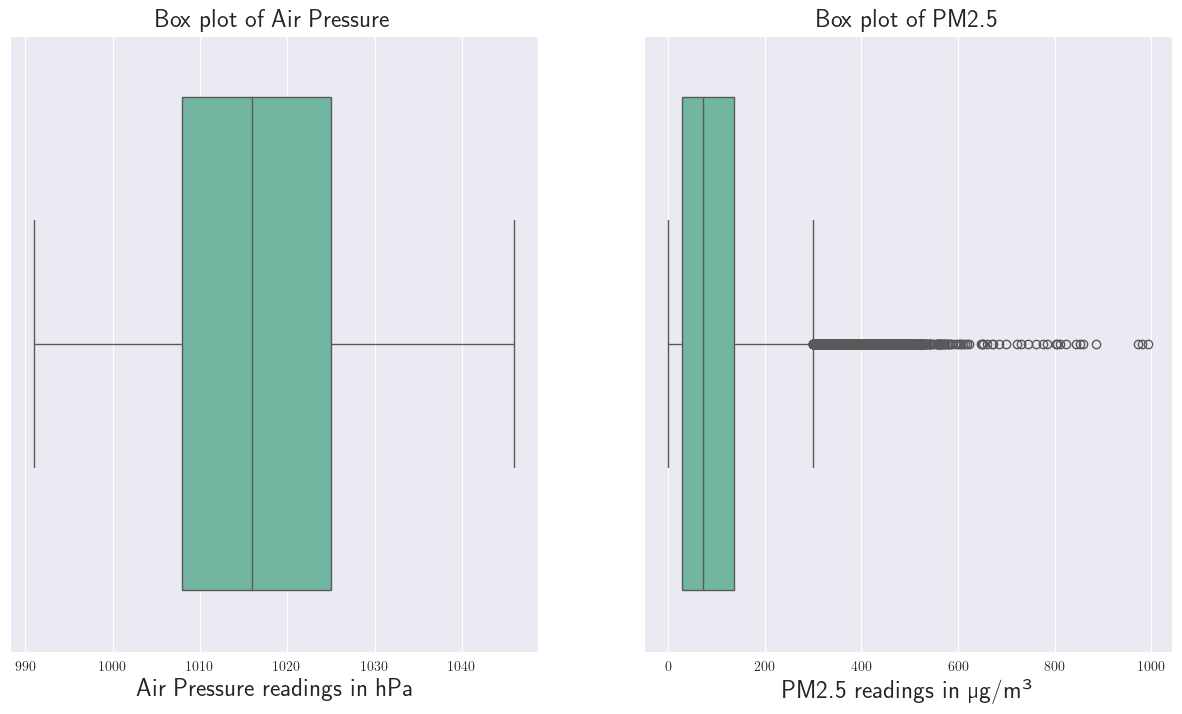

In [9]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)  
g1 = sns.boxplot(x=df['PRES'], orient="h", palette="Set2")
g1.set_title('Box plot of Air Pressure', fontsize=plot_fontsize)
g1.set_xlabel('Air Pressure readings in hPa', fontsize=plot_fontsize)

plt.subplot(1, 2, 2) 
g2 = sns.boxplot(x=df['pm2.5'], orient="h", palette="Set2")
g2.set_title('Box plot of PM2.5', fontsize=plot_fontsize)
g2.set_xlabel('PM2.5 readings in µg/m³', fontsize=plot_fontsize)

plt.show()

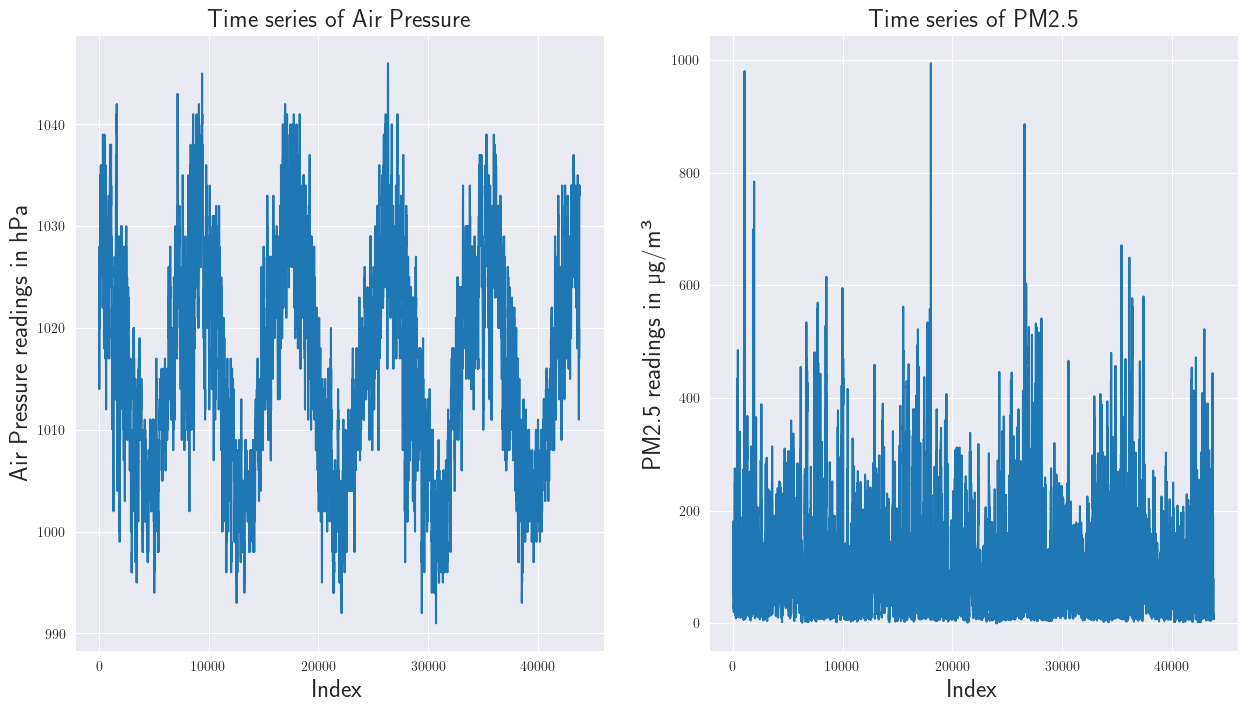

In [10]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1) 
g1 = sns.lineplot(data=df['PRES'])
g1.set_title('Time series of Air Pressure', fontsize=plot_fontsize)
g1.set_xlabel('Index', fontsize=plot_fontsize)
g1.set_ylabel('Air Pressure readings in hPa', fontsize=plot_fontsize)

plt.subplot(1, 2, 2)  
g2 = sns.lineplot(data=df['pm2.5'])
g2.set_title('Time series of PM2.5', fontsize=plot_fontsize)
g2.set_xlabel('Index', fontsize=plot_fontsize)
g2.set_ylabel('PM2.5 readings in µg/m³', fontsize=plot_fontsize)

plt.show()

- ***Los algoritmos de gradiente descendiente funcionan mejor (por ejemplo, convergen más rápido) si las variables están dentro del intervalo*** $[-1, 1]$. Muchas fuentes relajan el límite hasta $[-3, 3]$. La variable `PRES` es escalada con `minmax` para limitar la variable transformada dentro de $[0,1]$.

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_PRES'] = scaler.fit_transform(np.array(df['PRES']).reshape(-1, 1))

````{admonition} Observación
:class: tip

- Antes de entrenar el modelo, el conjunto de datos se divide en dos partes: el conjunto de ***entrenamiento*** y el conjunto de ***validación***. La red neuronal se entrena en el conjunto de entrenamiento. Esto significa que ***el cálculo de la función de pérdida, la propagación hacia atrás y los pesos actualizados mediante un algoritmo de gradiente descendiente se realizan en el conjunto de entrenamiento***.

- ***El conjunto de validación se utiliza para evaluar el modelo y determinar el número de épocas en su entrenamiento***. Aumentar el número de épocas reducirá aún más la función de pérdida en el conjunto de entrenamiento, pero no necesariamente tendrá el mismo efecto en el conjunto de validación debido al sobreajuste en el conjunto de entrenamiento, por lo que ***el número de épocas se controla manteniendo una evaluación y verificación sobre la función de pérdida calculada para el conjunto de validación***.
````

- Utilizamos `Keras` con el backend `Tensorflow` para definir y entrenar el modelo. Todos los pasos implicados en el entrenamiento y validación del modelo se realizan llamando a las funciones apropiadas de la `API` de `Keras`.

- Los cuatro primeros años, ***de 2010 a 2013, se utilizan como entrenamiento y
2014 se utiliza para la validación***

In [12]:
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (35064, 9)
Shape of test: (8760, 9)


In [13]:
df_train.head()

,No,year,month,day,hour,pm2.5,PRES,datetime,scaled_PRES
0,1,2010,1,1,0,NaN,1021.0,2010-01-01 00:00:00,0.545455
1,2,2010,1,1,1,NaN,1020.0,2010-01-01 01:00:00,0.527273
2,3,2010,1,1,2,NaN,1019.0,2010-01-01 02:00:00,0.509091
3,4,2010,1,1,3,NaN,1019.0,2010-01-01 03:00:00,0.509091
4,5,2010,1,1,4,NaN,1018.0,2010-01-01 04:00:00,0.490909


In [14]:
df_val.head()

,No,year,month,day,hour,pm2.5,PRES,datetime,scaled_PRES
35064,35065,2014,1,1,0,24.0,1014.0,2014-01-01 00:00:00,0.418182
35065,35066,2014,1,1,1,53.0,1013.0,2014-01-01 01:00:00,0.400000
35066,35067,2014,1,1,2,65.0,1013.0,2014-01-01 02:00:00,0.400000
35067,35068,2014,1,1,3,70.0,1013.0,2014-01-01 03:00:00,0.400000
35068,35069,2014,1,1,4,79.0,1012.0,2014-01-01 04:00:00,0.381818


- Restablecemos los ***índices del conjunto de validación***

In [15]:
df_val.reset_index(drop=True, inplace=True)

In [16]:
df_val.head()

,No,year,month,day,hour,pm2.5,PRES,datetime,scaled_PRES
0,35065,2014,1,1,0,24.0,1014.0,2014-01-01 00:00:00,0.418182
1,35066,2014,1,1,1,53.0,1013.0,2014-01-01 01:00:00,0.400000
2,35067,2014,1,1,2,65.0,1013.0,2014-01-01 02:00:00,0.400000
3,35068,2014,1,1,3,70.0,1013.0,2014-01-01 03:00:00,0.400000
4,35069,2014,1,1,4,79.0,1012.0,2014-01-01 04:00:00,0.381818


- También ***se grafican las series temporales de entrenamiento y validación normalizadas para PRES***.

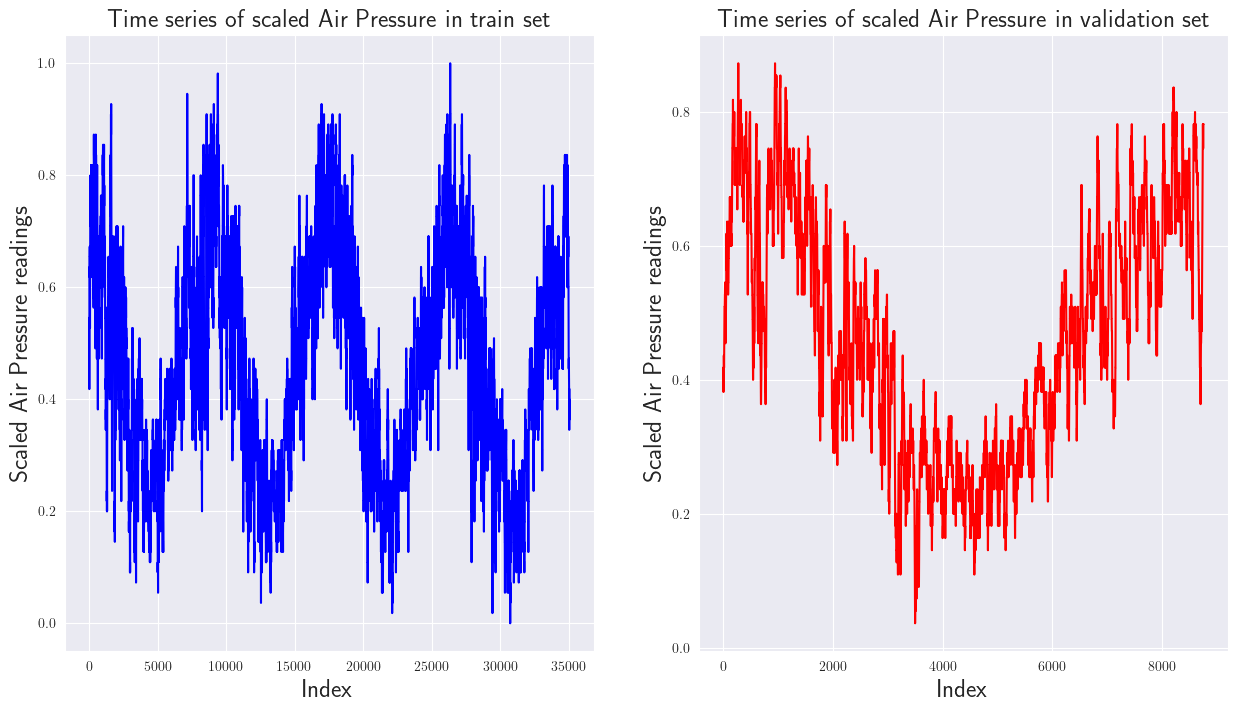

In [17]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1) 
g1 = sns.lineplot(df_train['scaled_PRES'], color='b')
g1.set_title('Time series of scaled Air Pressure in train set', fontsize=plot_fontsize)
g1.set_xlabel('Index', fontsize=plot_fontsize)
g1.set_ylabel('Scaled Air Pressure readings', fontsize=plot_fontsize);

plt.subplot(1, 2, 2)
g2 = sns.lineplot(df_val['scaled_PRES'], color='r')
g2.set_title('Time series of scaled Air Pressure in validation set', fontsize=plot_fontsize)
g2.set_xlabel('Index', fontsize=plot_fontsize)
g2.set_ylabel('Scaled Air Pressure readings', fontsize=plot_fontsize);

plt.show()

````{admonition} Regresores y Variable Objetivo
:class: tip 

- Ahora necesitamos generar los ***regresores*** ($X$) y la ***variable objetivo*** ($y$) para el entrenamiento y la validación. ***La matriz bidimensional de regresores y la matriz unidimensional objetivo se crean a partir de la matriz unidimensional original de la columna standardized_PRES*** en el *DataFrame*. 

- Para el modelo de predicción de series temporales, de este ejemplo, ***se utilizan las observaciones de los últimos siete días para predecir el día siguiente***. Esto equivale a un modelo $AR(7)$. Definimos una función que toma la serie temporal original y el número de pasos temporales en regresores como entrada para generar las matrices $X$ e $y$
````

In [18]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        if i-nb_timesteps <= 4:
            print(i-nb_timesteps, i-1, i)
        X.append(list(ts.loc[i-nb_timesteps:i-1])) #Regressors
        y.append(ts.loc[i]) #Target
    X, y = np.array(X), np.array(y)
    return X, y

In [19]:
X_train, y_train = makeXy(df_train['scaled_PRES'], 7)

0 6 7
1 7 8
2 8 9
3 9 10
4 10 11


In [20]:
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (35057, 7) (35057,)


In [21]:
X_val, y_val = makeXy(df_val['scaled_PRES'], 7)

0 6 7
1 7 8
2 8 9
3 9 10
4 10 11


In [22]:
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8753, 7) (8753,)


- Ahora definimos la red `MLP` utilizando la `API` funcional de `Keras`. En este enfoque ***una capa puede ser declarada como la entrada de la siguiente capa en el momento de definir la siguiente***

In [23]:
input_layer = Input(shape=(7,), dtype='float32')

- En este caso, `Input` es una función que se utiliza para ***crear una capa de entrada en un modelo de red neuronal***. `shape=(7,)` específica la ***forma de los datos de entrada***. En este caso, *significa que los datos de entrada tendrán 7 dimensiones*. `dtype='float32'` especifica el ***tipo de datos de los elementos de la capa de entrada**. En este caso, son números de punto *flotante de 32 bits*.

- Las capas densas las definimos en esta caso con ***activación lineal***. Puede utilizar un `GridSearch` tal como se hizo en el curso de ***Machine Learning*** para encontrar ***hiperparámetros adecuados minimizando las métricas de regresión***.

In [24]:
dense1 = Dense(32, activation='linear')(input_layer)
dense2 = Dense(16, activation='linear')(dense1)
dense3 = Dense(16, activation='linear')(dense2)

````{admonition} **Dense** e **input_layer**
:class: tip

- ***`Dense`***: Correspone a una ***capa totalmente conectada*** (fully connected).
- ***Unidades (Neurons)***: 32 neuronas.
- ***`dense1`***: Esta capa ***toma como entrada*** `input_layer`, que puede ser la ***capa de entrada del modelo u otra capa anterior***. 
- ***`dense2`***: Esta capa ***toma como entrada la salida de*** `dense1`. Esto significa que ***los 32 valores de salida de*** `dense1` ***se usan como entrada para*** `dense2`. Similarmente, ocurre con `dense3`
````

````{admonition} Observación

- Las ***múltiples capas ocultas y el gran número de neuronas en cada capa oculta*** le dan a las redes neuronales la ***capacidad de modelar la compleja no linealidad de las relaciones subyacentes entre los regresores y el objetivo***. Sin embargo, las redes neuronales profundas también ***pueden sobreajustar los datos de entrenamiento*** y dar malos resultados en el conjunto de validación o prueba. La función `Dropout` se ha utilizado eficazmente para ***regularizar las redes neuronales profundas***. 
````

- En este ejemplo, se añade una capa `Dropout` antes de la capa de salida. ***Dropout aleatoriamente establece*** $p$ ***fracción de neuronas de entrada a cero antes de pasar a la siguiente capa***. La eliminación aleatoria de entradas actúa esencialmente como un tipo de ensamblaje de modelos de agregación `bootstrap`.

- Por ejemplo, ***el bosque aleatorio utiliza el ensamblaje mediante la construcción de árboles en subconjuntos aleatorios de características de entrada***. Utilizamos $p=0.2$ para *descartar el 20% de las características de entrada seleccionadas aleatoriamente*.

In [25]:
dropout_layer = Dropout(0.2)(dense3)

- Por último, ***la capa de salida predice la presión atmosférica del día siguiente***

In [26]:
output_layer = Dense(1, activation='linear')(dropout_layer)

- Las capas de entrada, densa y de salida se empaquetarán ahora dentro de un modelo, que es una clase envolvente para entrenar y hacer predicciones. ***Como función de pérdida se utiliza el error cuadrático medio*** (MSE). Los pesos de la red se optimizan mediante el algoritmo `Adam`. `Adam` significa ***Estimación Adaptativa de Momentos*** y ha sido una opción popular para el entrenamiento de redes neuronales profundas. 

- A diferencia del ***Gradiente Descendiente Estocástico, Adam utiliza diferentes tasas de aprendizaje para cada peso y las actualiza por separado a medida que avanza el entrenamiento***. La tasa de aprendizaje de un peso se actualiza basándose en medias móviles ponderadas exponencialmente de los gradientes del peso y los gradientes al cuadrado.

In [27]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_squared_error', optimizer='adam')
ts_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)

````{admonition} Observación
:class: tip

- En este caso, `Params #` es calculado mediante la fórmula: ***`Param # = #Entradas x #Neuronas + #Neuronas`***. Esto incluye los ***pesos de cada conexión entre las entradas y las neuronas*** y un ***bias para cada neurona***. En este caso `Params # = 7x32 + 32 = 256`.

- El modelo se entrena llamando a la función `fit()` en el objeto modelo y pasándole `X_train` y `y_train`. El entrenamiento se realiza para un ***número predefinido de épocas***. Además, `batch_size` define el ***número de muestras del conjunto de entrenamiento que se utilizarán para una instancia de backpropagation***.
````

- El conjunto de datos de validación también se pasa para evaluar el modelo después de cada `epoch` completa. Un objeto ***`ModelCheckpoint` rastrea la función de pérdida en el conjunto de validación y guarda el modelo para la época en la que la función de pérdida ha sido mínima***.

In [28]:
save_weights_at = os.path.join('keras_models', 'PRSA_data_Air_Pressure_MLP_weights.{epoch:02d}-{val_loss:.4f}.keras')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min', save_freq='epoch');

- Aquí `val_loss` es el ***valor de la función de coste para los datos de validación cruzada*** y `loss` es el ***valor de la función de coste para los datos de entrenamiento***. Con `verbose=0`, no se imprime ningún mensaje en la consola durante el proceso de guardado del modelo. `period=1` indica que ***el modelo se evaluará y potencialmente se guardará después de cada época***.

````python
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=2, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True);
````

```{figure} ./figures/airpresure_mlp_epochs.png
:scale: 100

```

- En este caso, el modo `verbose=2` muestra una ***barra de progreso por cada época***. Los modos posibles son: `0` para no mostrar nada, `1` para mostrar la barra de progreso, `2` para mostrar una línea por época. Las ***muestras se mezclan aleatoriamente antes de cada época*** (`shuffle=True`).

- Se hacen predicciones para la presión atmosférica a partir del mejor modelo guardado. ***Las predicciones del modelo sobre la presión atmosférica escalada, se transforman inversamente para obtener predicciones sobre la presión atmosférica original***. También se calcula la bondad de ajuste o ***`R cuadrado`***.

In [29]:
best_model = load_model(os.path.join('keras_models', 'PRSA_data_Air_Pressure_MLP_weights.05-0.0001.keras'), compile=False)
preds = best_model.predict(X_val)
pred_PRES = scaler.inverse_transform(preds)
pred_PRES = np.squeeze(pred_PRES)

274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


In [30]:
r2 = r2_score(df_val['PRES'].loc[7:], pred_PRES)
print('R-squared for the validation set:', round(r2,4))

R-squared for the validation set: 0.9955


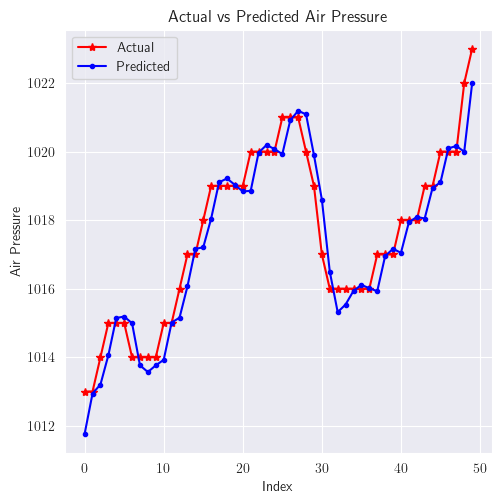

In [31]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['PRES'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index');

- Para ***predecir la variable*** `pm2.5` usando `MLP` usamos la implementación presentada a continuación

In [32]:
df = pd.read_csv('datasets/PRSA_data_2010.1.1-2014.12.31.csv', usecols=lambda column: column not in ['DEWP', 'TEMP', 'cbwd', 'Iws',	'Is', 'Ir'])

In [33]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (43824, 7)


In [34]:
df.head()

,No,year,month,day,hour,pm2.5,PRES
0,1,2010,1,1,0,NaN,1021.0
1,2,2010,1,1,1,NaN,1020.0
2,3,2010,1,1,2,NaN,1019.0
3,4,2010,1,1,3,NaN,1019.0
4,5,2010,1,1,4,NaN,1018.0


In [35]:
"""
Rows having NaN values in column pm2.5 are dropped.
"""
df.dropna(subset=['pm2.5'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [36]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

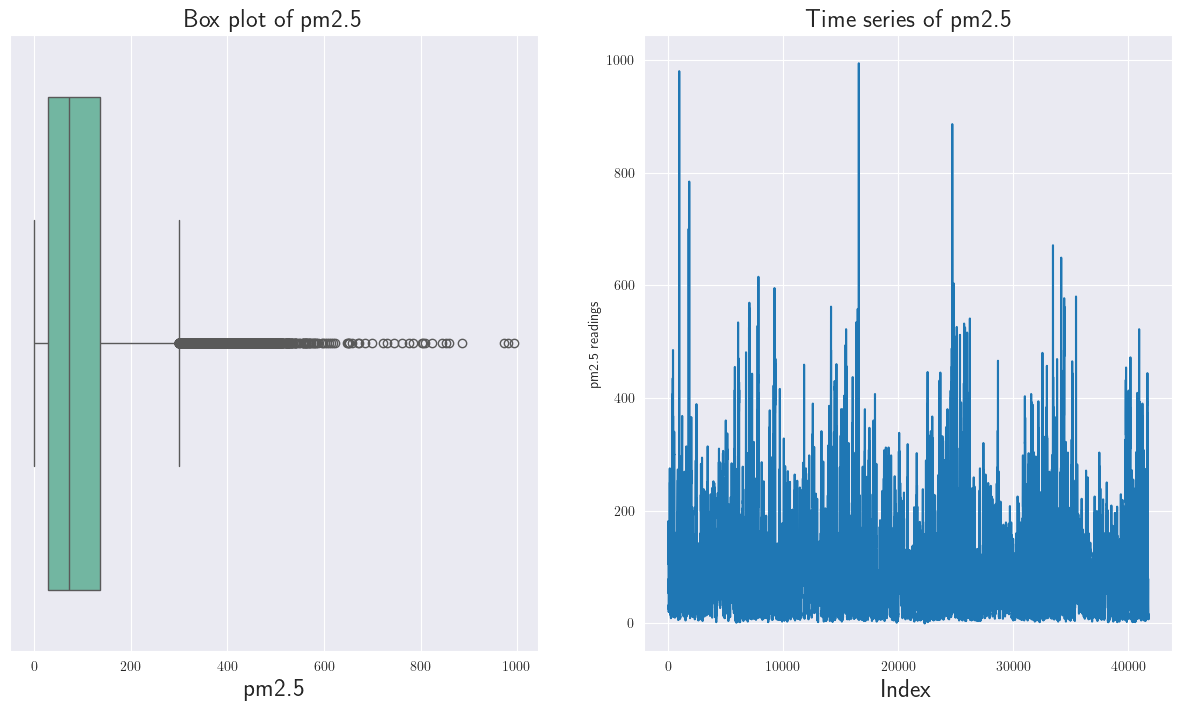

In [37]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1) 
g1 = sns.boxplot(df['pm2.5'], orient="h", palette="Set2")
g1.set_title('Box plot of pm2.5', fontsize=plot_fontsize);
g1.set_xlabel(xlabel='pm2.5', fontsize=plot_fontsize)
g1.set(yticklabels=[])
g1.tick_params(left=False);

plt.subplot(1, 2, 2)
g2 = sns.lineplot(df['pm2.5'])
g2.set_title('Time series of pm2.5', fontsize=plot_fontsize)
g2.set_xlabel('Index', fontsize=plot_fontsize)
g2.set_ylabel('pm2.5 readings');

plt.show()

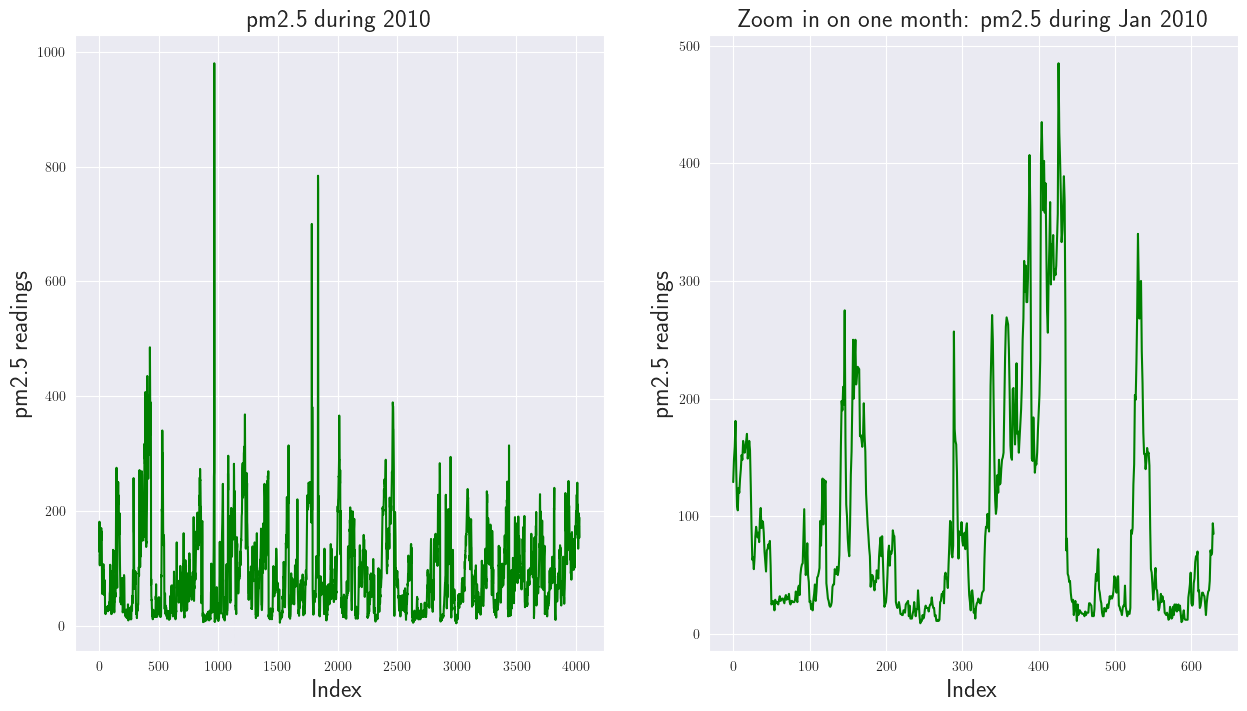

In [38]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
g1 = sns.lineplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=6,day=30)], color='g')
g1.set_title('pm2.5 during 2010', fontsize=plot_fontsize)
g1.set_xlabel('Index', fontsize=plot_fontsize)
g1.set_ylabel('pm2.5 readings', fontsize=plot_fontsize);

plt.subplot(1, 2, 2)
g = sns.lineplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=1,day=31)], color='g')
g.set_title('Zoom in on one month: pm2.5 during Jan 2010', fontsize=plot_fontsize)
g.set_xlabel('Index', fontsize=plot_fontsize)
g.set_ylabel('pm2.5 readings', fontsize=plot_fontsize);

plt.show()

In [39]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_pm2.5'] = scaler.fit_transform(np.array(df['pm2.5']).reshape(-1, 1))

In [40]:
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (33096, 9)
Shape of test: (8661, 9)


In [41]:
df_train.head()

,No,year,month,day,hour,pm2.5,PRES,datetime,scaled_pm2.5
0,25,2010,1,2,0,129.0,1020.0,2010-01-02 00:00:00,0.129779
1,26,2010,1,2,1,148.0,1020.0,2010-01-02 01:00:00,0.148893
2,27,2010,1,2,2,159.0,1021.0,2010-01-02 02:00:00,0.159960
3,28,2010,1,2,3,181.0,1022.0,2010-01-02 03:00:00,0.182093
4,29,2010,1,2,4,138.0,1022.0,2010-01-02 04:00:00,0.138833


In [42]:
df_val.head()

,No,year,month,day,hour,pm2.5,PRES,datetime,scaled_pm2.5
33096,35065,2014,1,1,0,24.0,1014.0,2014-01-01 00:00:00,0.024145
33097,35066,2014,1,1,1,53.0,1013.0,2014-01-01 01:00:00,0.053320
33098,35067,2014,1,1,2,65.0,1013.0,2014-01-01 02:00:00,0.065392
33099,35068,2014,1,1,3,70.0,1013.0,2014-01-01 03:00:00,0.070423
33100,35069,2014,1,1,4,79.0,1012.0,2014-01-01 04:00:00,0.079477


In [43]:
df_val.reset_index(drop=True, inplace=True)

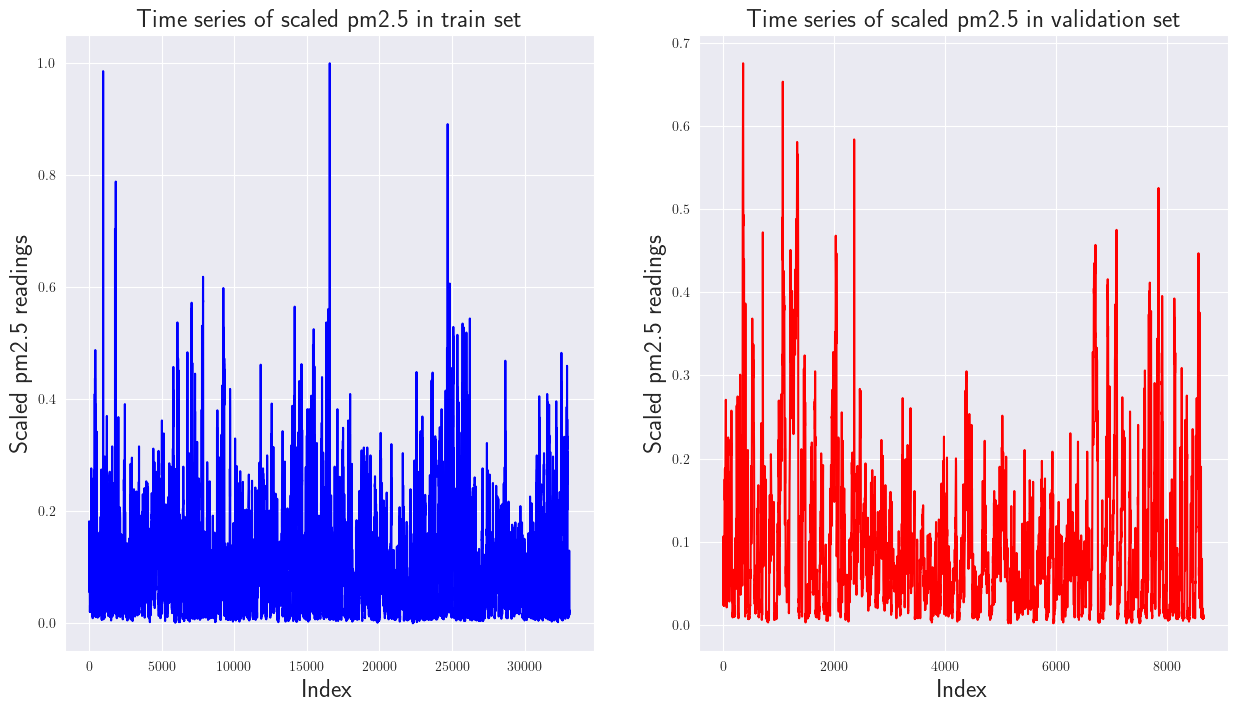

In [44]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
g1 = sns.lineplot(df_train['scaled_pm2.5'], color='b')
g1.set_title('Time series of scaled pm2.5 in train set', fontsize=plot_fontsize)
g1.set_xlabel('Index', fontsize=plot_fontsize)
g1.set_ylabel('Scaled pm2.5 readings', fontsize=plot_fontsize);

plt.subplot(1, 2, 2)
g2 = sns.lineplot(df_val['scaled_pm2.5'], color='r')
g2.set_title('Time series of scaled pm2.5 in validation set', fontsize=plot_fontsize)
g2.set_xlabel('Index', fontsize=plot_fontsize)
g2.set_ylabel('Scaled pm2.5 readings', fontsize=plot_fontsize);

plt.show()

In [45]:
X_train, y_train = makeXy(df_train['scaled_pm2.5'], 7)

0 6 7
1 7 8
2 8 9
3 9 10
4 10 11


In [46]:
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (33089, 7) (33089,)


In [47]:
X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)

0 6 7
1 7 8
2 8 9
3 9 10
4 10 11


In [48]:
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8654, 7) (8654,)


- Definimos la ***capa de entrada*** que tiene forma `(None, 7)` y de tipo `float32`

In [49]:
input_layer = Input(shape=(7,), dtype='float32')

In [50]:
#Dense layers are defined with linear activation
dense1 = Dense(32, activation='tanh')(input_layer)
dense2 = Dense(16, activation='tanh')(dense1)
dense3 = Dense(16, activation='tanh')(dense2)

In [51]:
dropout_layer = Dropout(0.2)(dense3)

In [52]:
#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)

In [53]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')
ts_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)

````python
save_weights_at = os.path.join('keras_models', 'PRSA_data_PM2.5_MLP_weights.{epoch:02d}-{val_loss:.4f}.keras')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min', save_freq='epoch')
````

````python
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True);
````

```{figure} ./figures/mlp_pm25_epochs.png
:scale: 100

```

In [54]:
best_model = load_model(os.path.join('keras_models', 'PRSA_data_PM2.5_MLP_weights.19-0.0116.keras'), compile=False)
preds = best_model.predict(X_val)
pred_pm25 = scaler.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)

271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [55]:
mae = mean_absolute_error(df_val['pm2.5'].loc[7:], pred_pm25)
print('MAE for the validation set:', round(mae, 4))

MAE for the validation set: 11.5359


- Trazamos los 50 primeros valores reales y predichos de `pm2.5`

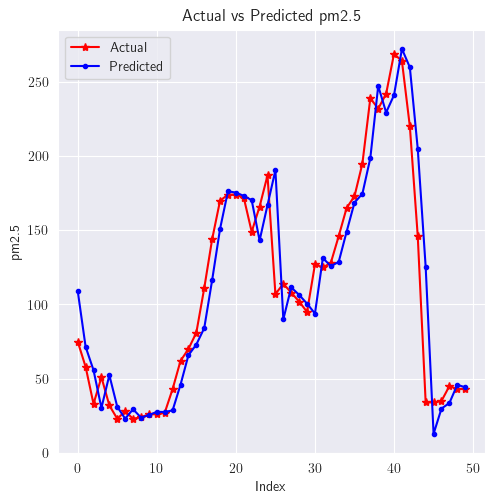

In [56]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index');

## LSTM para la predicción de series de tiempo

In [57]:
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
print('Shape of 3D arrays:', X_train.shape, X_val.shape)

Shape of 3D arrays: (33089, 7, 1) (8654, 7, 1)


In [58]:
from keras.layers import Dense, Input, Dropout
from keras.layers import LSTM
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [59]:
input_layer = Input(shape=(7,1), dtype='float32')

In [60]:
lstm_layer1 = LSTM(64, input_shape=(7,1), return_sequences=True)(input_layer)
lstm_layer2 = LSTM(32, input_shape=(7,64), return_sequences=False)(lstm_layer1)

In [61]:
dropout_layer = Dropout(0.2)(lstm_layer2)

In [62]:
output_layer = Dense(1, activation='linear')(dropout_layer)

In [63]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')#SGD(lr=0.001, decay=1e-5))
ts_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 7, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 7, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

````python
save_weights_at = os.path.join('keras_models', 'PRSA_data_PM2.5_LSTM_weights.{epoch:02d}-{val_loss:.4f}.keras')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min', save_freq='epoch')
````

````python
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)
````

````{figure} ./figures/lstm_epochs.png
:scale: 100

````

In [64]:
best_model = load_model(os.path.join('keras_models', 'PRSA_data_PM2.5_LSTM_weights.20-0.0116.keras'))

In [65]:
preds = best_model.predict(X_val)
pred_pm25 = scaler.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)

271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [66]:
from sklearn.metrics import mean_absolute_error

In [67]:
mae = mean_absolute_error(df_val['pm2.5'].loc[7:], pred_pm25)
print('MAE for the validation set:', round(mae, 4))

MAE for the validation set: 11.5265


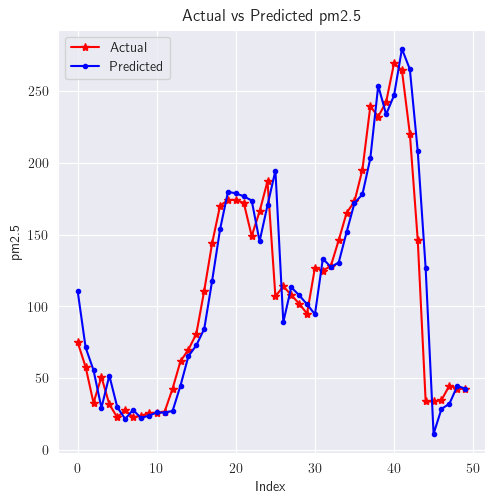

In [68]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index');